<a href="https://colab.research.google.com/github/zyuzyunda/TelcoCustomerChurn/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%BB%D1%8F_%D0%B8%D0%B4%D0%B5%D0%BD%D1%82%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE_%D1%83%D1%85%D0%BE%D0%B4%D1%8F%D1%89%D0%B8%D1%85_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Модели машинного обучения для идентификации потенциально уходящих клиентов**


Цель: разработать для телекоммуникационной компании Telco модель, которая сможет эффективно предсказывать отток клиентов.

Ссылка на презентацию: https://drive.google.com/file/d/1kekNLetUBhd6Uo2UEW5cGH3GgIpJxwKo/view?usp=sharing

Ссылка на подробное описание работы: https://docs.google.com/document/d/1dVSjNX3Nvrk9XQzo73RF0hVQgNoFZh1H/edit?usp=sharing&ouid=108737869227856172609&rtpof=true&sd=true

Контакты: tg @zyuzyunda

# lib

In [2]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.1 MB/s eta 0:00:00


In [9]:
pip install nona

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif


In [4]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [6]:
from sklearn.metrics import RocCurveDisplay

In [10]:
from nona.nona import nona

In [11]:
from sklearn.preprocessing import LabelEncoder

# data

Для выполнения работы были взяты данные телекоммуникационной компании Telco с сайта IBM (https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv)

Набор данных содержит следующие категориальные переменные/признаки:
1.             CustomerID: Идентификатор клиента;
2.             gender: Пол клиента (Мужской, Женский);
3.             SeniorCitizen: Является ли клиент пожилым человеком или нет (1, 0);
4.             Partner: Имеет ли клиент партнера или нет (Да, Нет);
5.             Dependent: Имеет ли клиент иждивенцев или нет (Да, Нет);
6.             PhoneService: Имеет ли клиент телефонную связь или нет (Да, Нет);
7.             MultipleLines: Имеет ли клиент несколько линий или нет (Да, Нет, Нет телефонной связи);
8.             InternetService: Поставщик интернет-услуг клиента (DSL, Оптоволокно (Fiber Optic), Нет);
9.             OnlineSecurity: Имеет ли клиент онлайн-безопасность или нет (Да, Нет, Нет интернет-услуг);
10.          OnlineBackup: Имеет ли клиент онлайн-резервное копирование или нет (Да, Нет, Нет интернет-услуг);
11.          DeviceProtection: Имеет ли клиент защиту устройства или нет (Да, Нет, Нет интернет-услуг);
12.          TechSupport: Имеет ли клиент техническую поддержку или нет (Да, Нет, Нет интернет-услуг);
13.          StreamingTV: Имеет ли клиент стриминговое телевидение или нет (Да, Нет, Нет интернет-услуг);
14.          StreamingMovies: Имеет ли клиент стриминговые фильмы или нет (Да, Нет, Нет интернет-услуг);
15.          Contract: Срок действия контракта клиента (Ежемесячный, Один год, Два года);
16.          PaperlessBilling: Оплата счета без бумажного документооборота (Да, Нет);
17.          PaymentMethod: Способ оплаты клиента (Электронный чек, Почтовый чек, Банковский перевод (автоматический), Кредитная карта (автоматический)).
Также данные имеют числовые переменные/признаки:
1.             Tenure: количество месяцев, которое клиент пробыл в компании;
2.             MonthlyCharges: ежемесячные платежи;
3.             TotalCharges: общая сумма, взимаемая с клиента.

Наконец, есть признак для прогнозирования, то есть целевая переменная:
1.             Churn: Клиент ушел (Да, Нет).


In [12]:
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Подготовка данных

In [13]:
df.shape

(7043, 21)

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Изучим пропущенные значения с помощью библиотеки missingno

<Axes: >

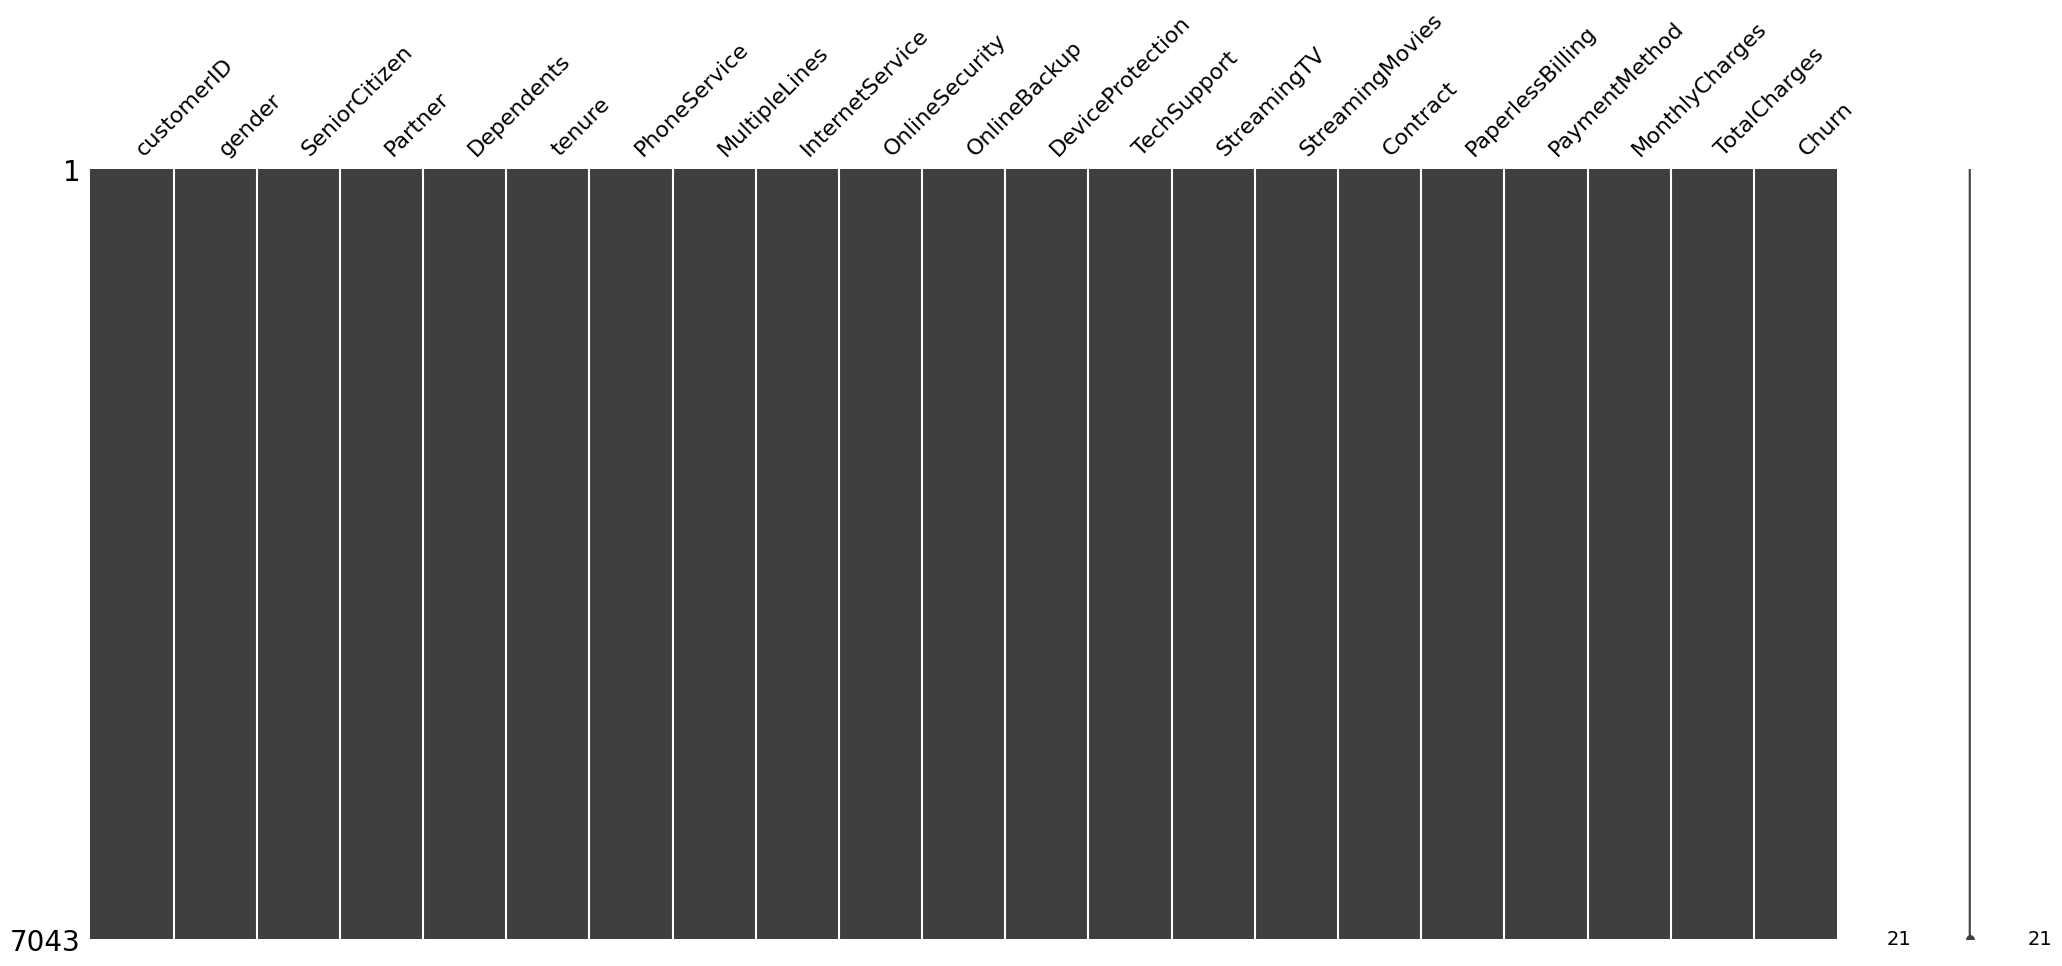

In [16]:
#Визуализация пропущенных значений
msno.matrix(df)

Видим, что пропущенных значений нет. Изучим тип данных каждой переменной.

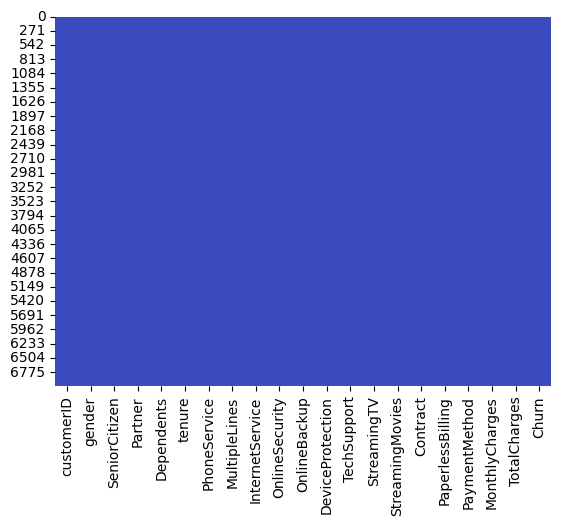

In [17]:
sns.heatmap(df.isnull(),cmap = 'coolwarm',cbar = False);

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [19]:
df = df.drop(['customerID'], axis = 1)

In [20]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

#errors='coerce' если возникает ошибка, то замена на NaN

In [21]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Обратим внимание, что категориальная переменная “SeniorCitizen” имеет тип “int64”, хотя должен быть тип “object”. А “TotalCharges” имеет тип “float64”, хотя должен быть тип “float”. При исправлении типа данных переменных проводим повторно анализ пропущенных значений.

<Axes: >

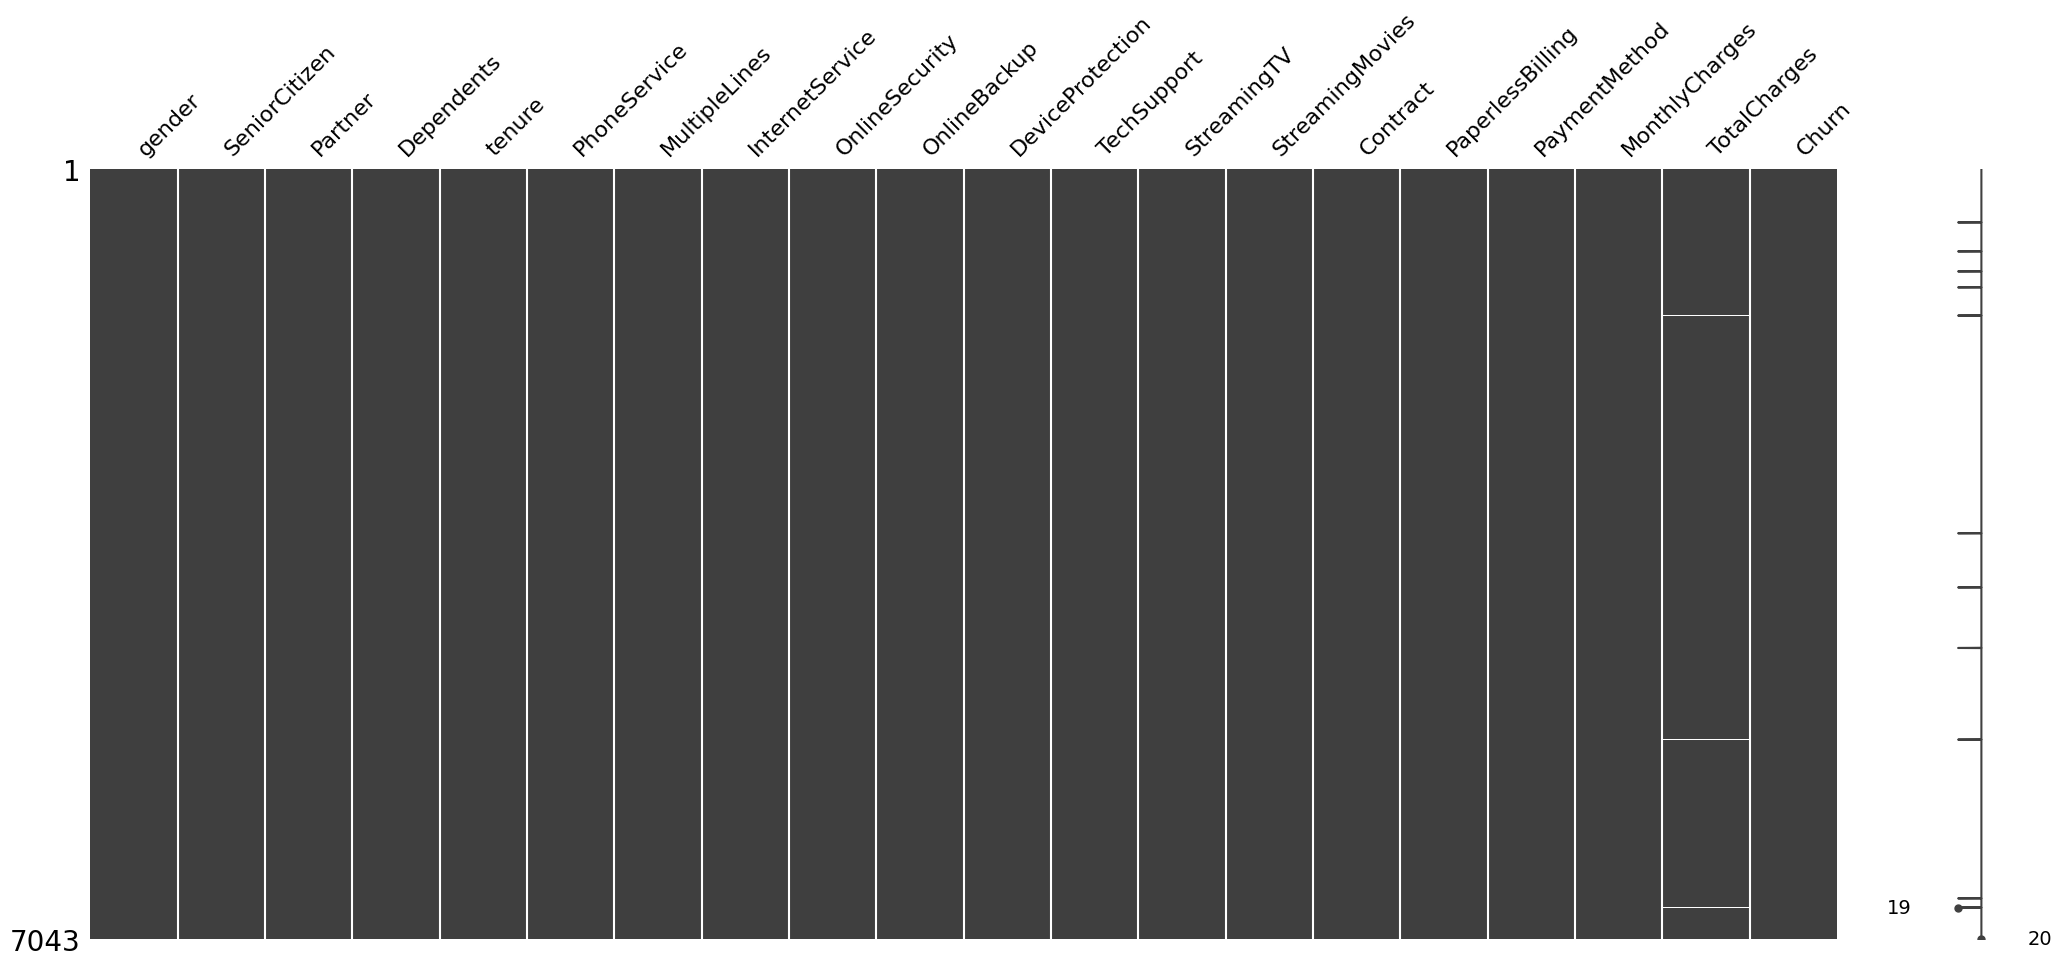

In [22]:
msno.matrix(df)

In [23]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Наблюдаем 11 пропущенных значений в переменной “TotalCharges”. Изучим дополнительно пропущенные значения.

In [24]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [25]:
#df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

При исследовании пропущенных значений можно заметить, что “TotalCharges” равен NaN, а значение “tenure” равно 0. Скорее всего это клиенты, которые никогда не пользовались услугами компании. Также обратим внимание, что это клиенты, которые не являются ‘SeniorCitizen’ и у которых есть иждивенцы. В большинстве случаев контракт заключают на 2 года и оплата счета с помощью бумажного документооборота. Исходя из особенностей данных было принято решение заполнить отсутствующие значения с помощью open-source-решения: использовать библиотеку NoNa (https://github.com/AbdualimovTP/nona)

Суть алгоритма заключается в том, чтобы заполнить пропуски различными методами машинного обучения. Повторная проверка на наличие пропущенных значений показывает, что данные готовы к следующему этапу.


In [26]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [27]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [28]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30
std,24.55,30.09,2266.77
min,1.00,18.25,18.80
25%,9.00,35.59,401.45
50%,29.00,70.35,1397.47
75%,55.00,89.86,3794.74
max,72.00,118.75,8684.80


In [29]:
encoders = {}
for col in ['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [30]:
label_mapping = {}
for col, le in encoders.items():
    label_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [31]:
label_mapping

{'SeniorCitizen': {'No': np.int64(0), 'Yes': np.int64(1)},
 'Partner': {'No': np.int64(0), 'Yes': np.int64(1)},
 'Dependents': {'No': np.int64(0), 'Yes': np.int64(1)},
 'OnlineSecurity': {'No': np.int64(0),
  'No internet service': np.int64(1),
  'Yes': np.int64(2)},
 'OnlineBackup': {'No': np.int64(0),
  'No internet service': np.int64(1),
  'Yes': np.int64(2)},
 'DeviceProtection': {'No': np.int64(0),
  'No internet service': np.int64(1),
  'Yes': np.int64(2)},
 'TechSupport': {'No': np.int64(0),
  'No internet service': np.int64(1),
  'Yes': np.int64(2)},
 'Contract': {'Month-to-month': np.int64(0),
  'One year': np.int64(1),
  'Two year': np.int64(2)},
 'PaperlessBilling': {'No': np.int64(0), 'Yes': np.int64(1)},
 'PaymentMethod': {'Bank transfer (automatic)': np.int64(0),
  'Credit card (automatic)': np.int64(1),
  'Electronic check': np.int64(2),
  'Mailed check': np.int64(3)}}

In [32]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [33]:
df1 = df.apply(lambda x: object_to_int(x))
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.16,0.48,0.30,32.42,0.79,0.91,0.90,0.80,0.69,0.59,1.57,64.80,2283.30
std,0.37,0.50,0.46,24.55,0.86,0.88,0.88,0.86,0.83,0.49,1.07,30.09,2266.77
min,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80
25%,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,35.59,401.45
50%,0.00,0.00,0.00,29.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,70.35,1397.47
75%,0.00,1.00,1.00,55.00,2.00,2.00,2.00,2.00,1.00,1.00,2.00,89.86,3794.74
max,1.00,1.00,1.00,72.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,118.75,8684.80


In [34]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [35]:
nona(df1)

100%|██████████| 20/20 [00:00<00:00, 2942.55it/s]


In [36]:
df1.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


Изучим средние значения всех признаков для клиентов, которые остались и ушли.

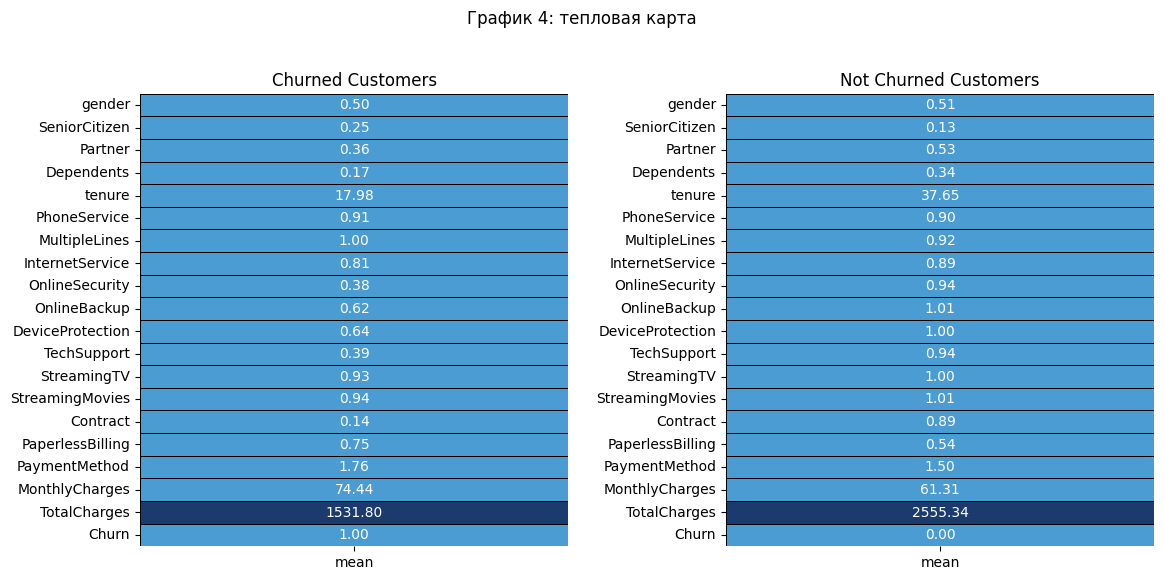

In [37]:
colors = ['#4B9CD3', '#1B3B6F']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))  # Увеличиваем размер для лучшей видимости

plt.subplot(1, 2, 1)
sns.heatmap(churn[['mean']], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.heatmap(not_churn[['mean']], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Not Churned Customers')

# Добавление общего заголовка для всей фигуры
fig.suptitle('График 4: тепловая карта')

fig.tight_layout(pad = 2)
plt.show()

У ушедших клиентов средний срок владения был низким — 17.98 месяцев, по сравнению с теми, кто продолжил, средний срок владения — 37.65 месяцев.
Суммарные расходы клиентов, которые ушли меньше в 1.7 раза.
Средние ежемесячные расходы у уходящих клиентов (74.44) больше, чем у неуходящих клиентов (61.31).


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

# Визуализация данных

/tmp/ipython-input-3841990781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df1, palette=['#4B9CD3', '#1B3B6F'])


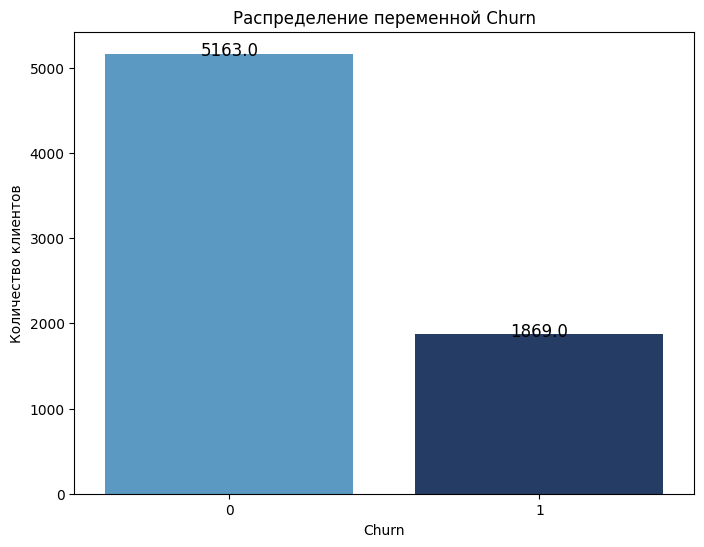

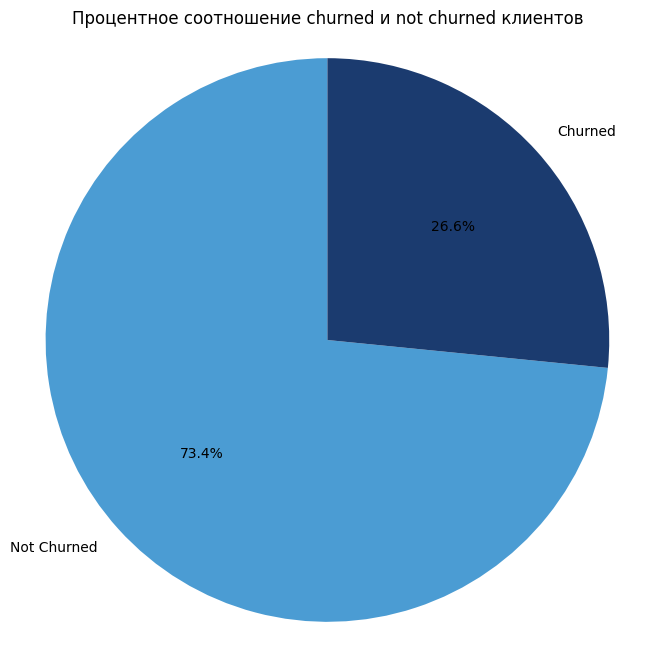

In [39]:
# Гистограмма распределения переменной Churn с количеством над каждым столбиком
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df1, palette=['#4B9CD3', '#1B3B6F'])
plt.title('Распределение переменной Churn')
plt.xlabel('Churn')
plt.ylabel('Количество клиентов')

# Добавление количества над каждым столбиком
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

plt.figure(figsize=(8, 8))
churn_counts = df1['Churn'].value_counts()
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['#4B9CD3', '#1B3B6F'])
plt.title('Процентное соотношение churned и not churned клиентов')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Для начала изучим целевую переменную – “Churn”:

Из визуализации видим, что набор данных несбалансирован (примерно в соотношении 3:1). Из-за этого прогнозы будут смещены в сторону не уходящих клиентов.
    

Для более удобного исследования данных распределим признаки по следующим группам:
1.	Группа №1 “Персональная инфомация о клиенте”: gender, SeniorCitizen, Partner, Dependents;
2.	Группа №2 “Услуги, на которые клиент может подписаться”: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport , StreamingTV, StreamingMovies;
3.	Группа №3 “Информация об оплате”: tenure, Contract , PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges.
Теперь построим столбчатые диаграммы для каждой группы, учитывая целевую переменную:


In [40]:
# Списки переменных
group1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
group2 = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
group3 = ['Contract', 'PaperlessBilling', 'PaymentMethod']

In [41]:
# Функция для создания гистограмм с подписями
def plot_histograms_with_churn(features, data):
    for feature in features:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=feature, hue='Churn', data=data, palette='Blues')
        plt.title(f'Распределение переменной {feature} с учетом Churn')
        plt.xlabel(feature)
        plt.ylabel('Количество клиентов')

        # Добавление количества над каждым столбиком
        for p in ax.patches:
            ax.annotate(f'\n{p.get_height()}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                        textcoords='offset points')

        plt.legend(title='Churn', loc='upper right')
        plt.show()

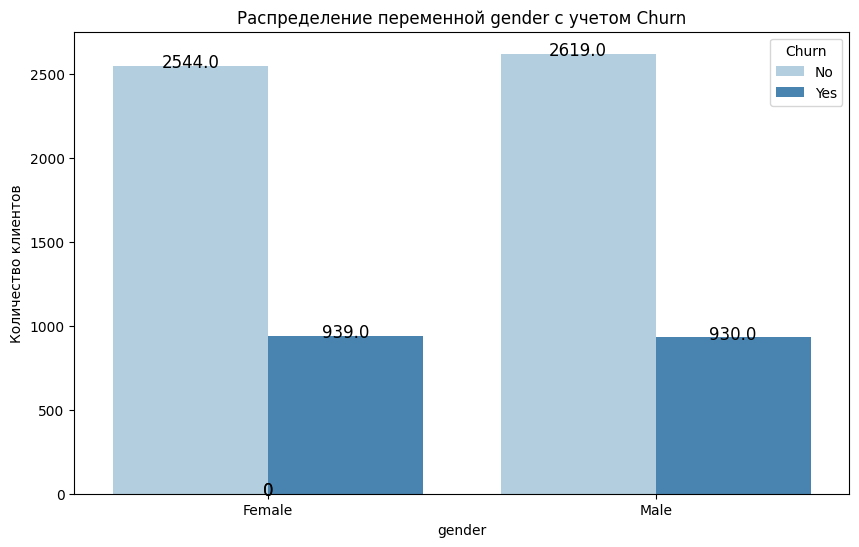

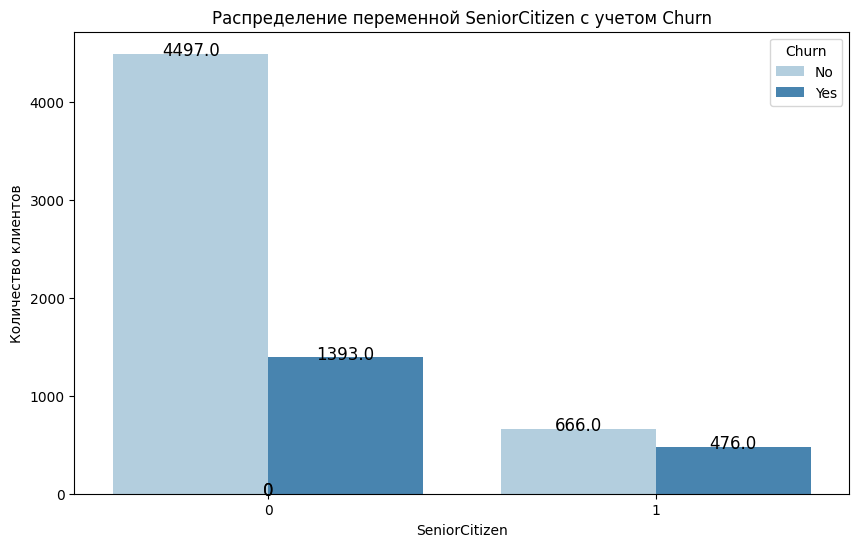

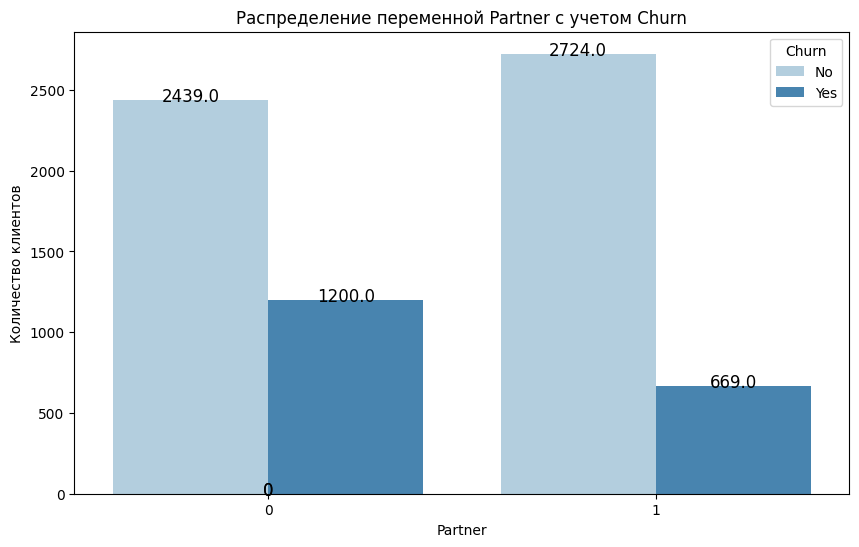

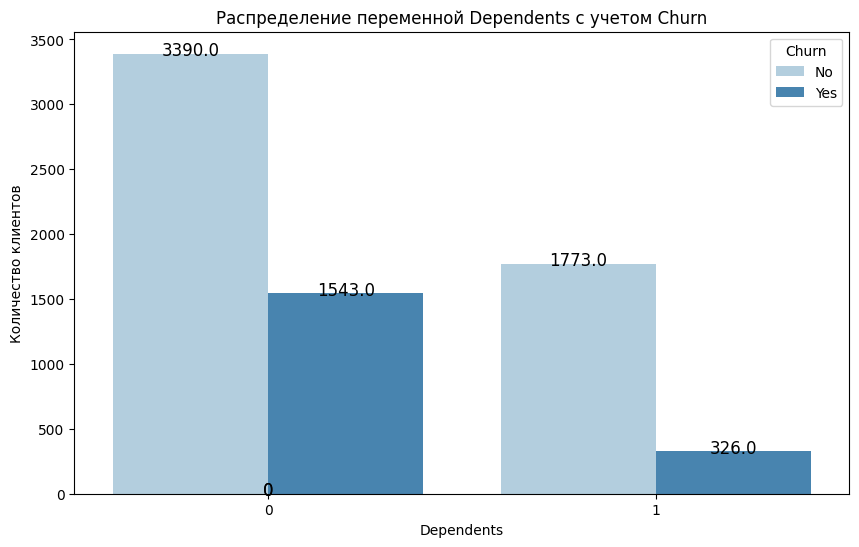

In [42]:
# Построение гистограмм для каждой группы переменных
plot_histograms_with_churn(group1, df)

Исходя из данных графиков можно сделать следующие выводы:

•	Отток клиентов мужского и женского пола протекает одинаково;

•	Представителей старшего поколения относительно мало, однако их доля в общем объеме оттока составляет около 40%. Этот процент соответствует 476 клиентам из общего числа 1142 пожилых клиентов;

•	Клиенты, совместно проживающие с партнером, проявляют более низкий уровень оттока. Аналогично, клиенты без иждивенцев также более склонны к оттоку.

Построим столбчатые диаграммы для группы №2 “Услуги, на которые клиент может подписаться”:


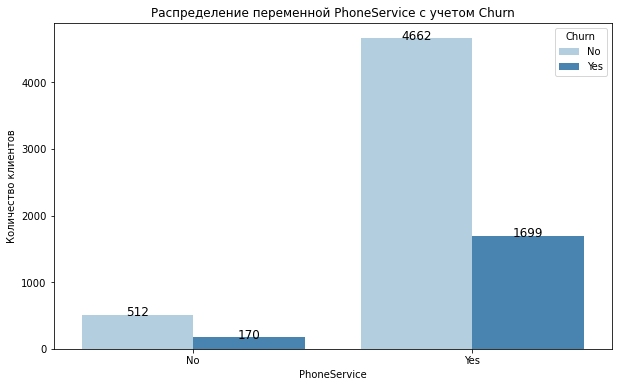

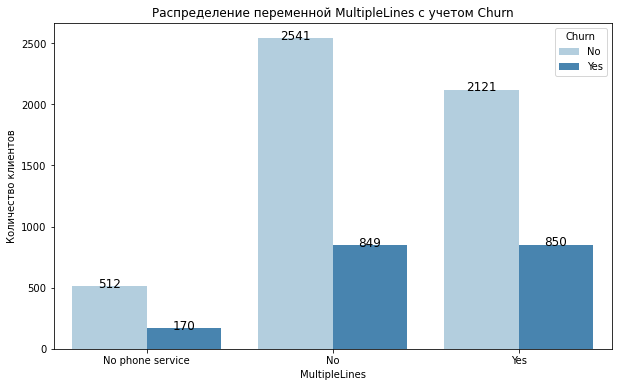

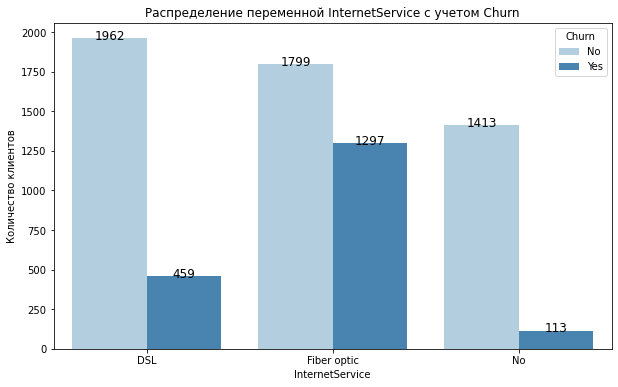

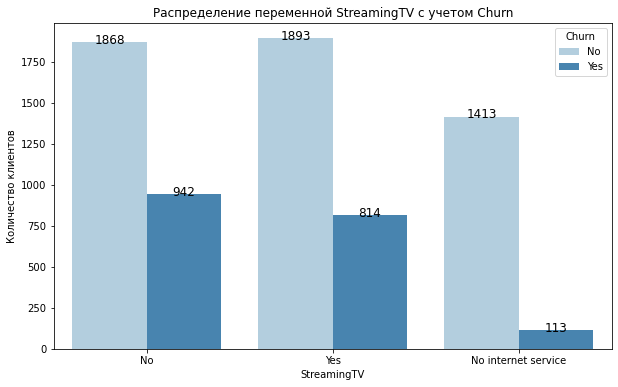

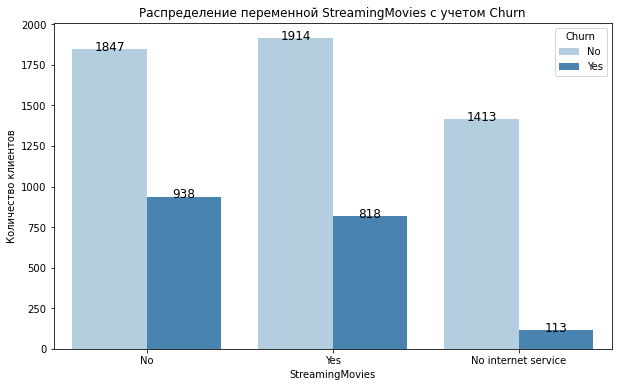

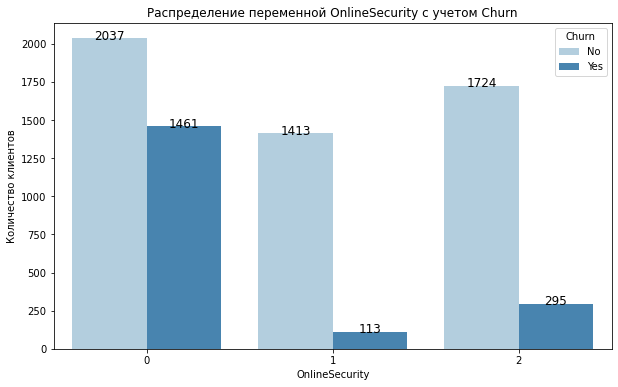

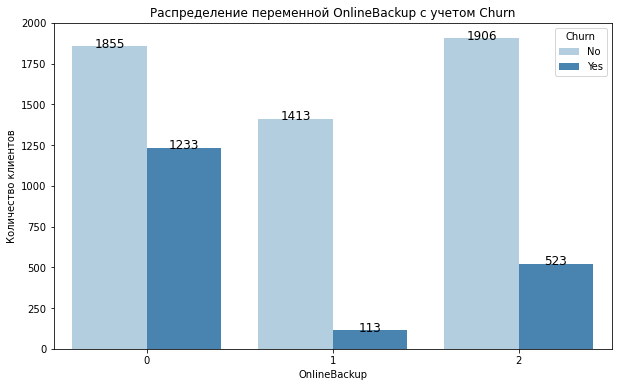

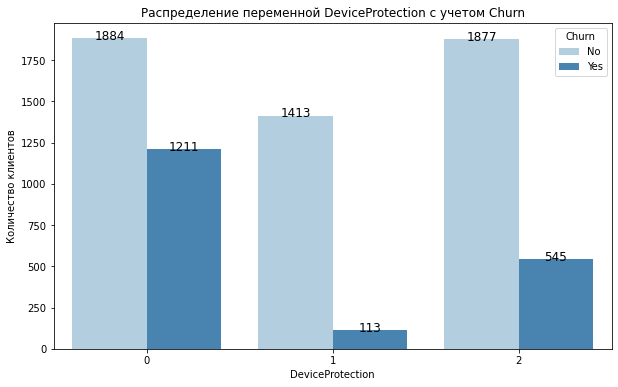

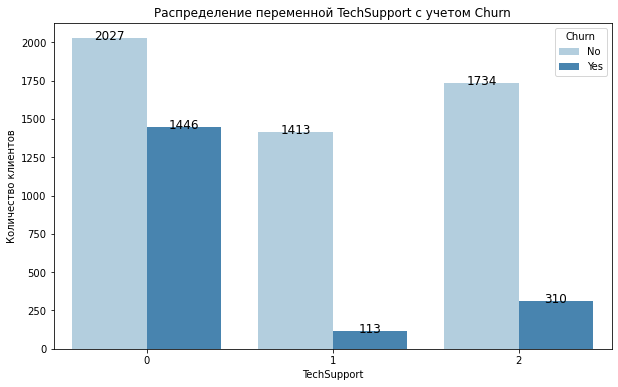

In [ ]:
plot_histograms_with_churn(group2, df)

Выводы по построенным графикам следующие:

•	Для услуги PhoneService большее количество клиентов остаются, даже если они не используют телефонные услуги, по сравнению с теми, кто отказывается от этой услуги;

•	В случае MultipleLines коэффициент оттока остается примерно одинаковым независимо от наличия нескольких линий;

•	Многие клиенты предпочитают использовать DSL вместо оптических волокон для доступа в интернет;

•	Графики StreamingTV и StreamingMovies выглядят почти одинаково. Многие клиенты перестают пользоваться услугами потокового телевидения и кино, независимо от их подписки на эти услуги.

Строим столбчатые диаграммы для группы №3 “Информация об оплате”:


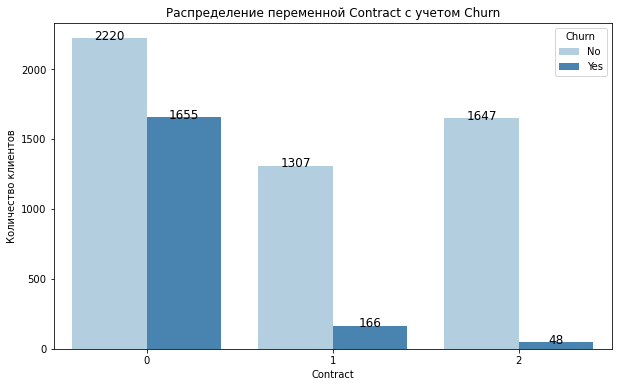

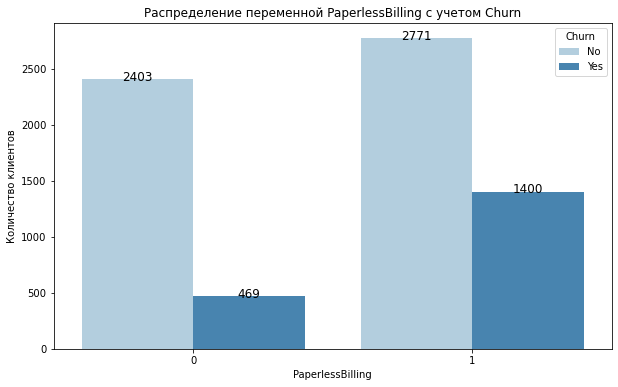

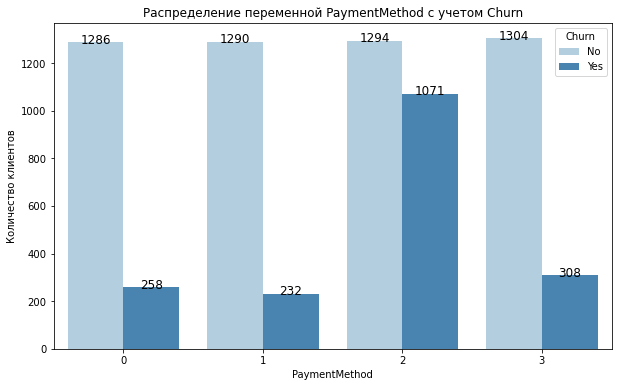

In [ ]:
plot_histograms_with_churn(group3, df)

В результате визуализации можно предположить следующее:

•	Отток клиентов с ежемесячным контрактом довольно высокий;

•	Большое количество клиентов уходят, когда используется безбумажное оформление счетов;

•	Клиенты не довольны оплатой через электронный чек. Из большого числа клиентов, которые использовали этот метод оплаты, значительная часть ушла из-за этого.


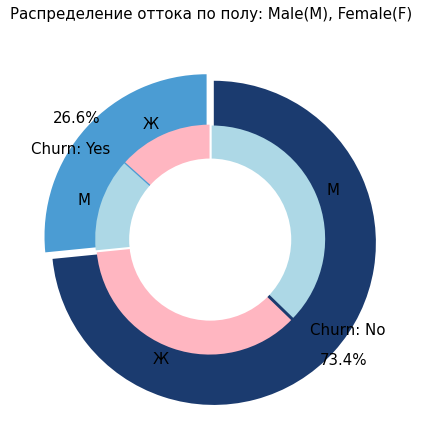

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

labels = ["Churn: Yes", "Churn: No"]
values = [1869, 5163]

labels_gender = ["Ж", "M", "Ж", "M"]
sizes_gender = [939, 930, 2544, 2619]

colors = ['#4B9CD3', '#1B3B6F']
colors_gender = ['#FFB6C1', '#ADD8E6', '#FFB6C1', '#ADD8E6']

explode = (0.3, 0.3)
explode_gender = (0.1, 0.1, 0.1, 0.1)

textprops = {"fontsize": 15}

plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8, colors=colors, startangle=90, frame=True, explode=explode, radius=10, textprops=textprops, counterclock=True)
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender, radius=7, textprops=textprops, counterclock=True)

centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Распределение оттока по полу: Male(M), Female(F)', fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Изучим распределение числовых переменных

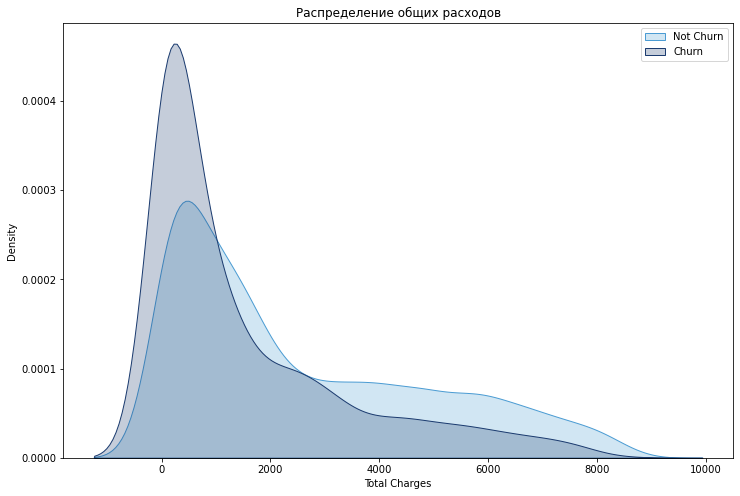

In [ ]:
plt.figure(figsize=(12, 8))

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color=colors[0], shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color=colors[1], shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Распределение общих расходов');

In [ ]:
df.head() #непреобразованные
df1.head(1) #преобразованные

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0


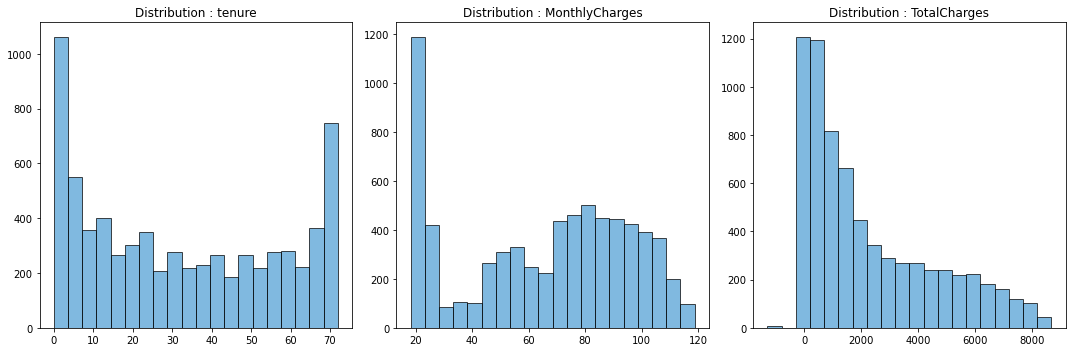

In [ ]:
import matplotlib.pyplot as plt

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    plt.hist(df1[feature], color=colors[0], bins=20, edgecolor='black', alpha=0.7)
    title = 'Distribution : ' + feature
    plt.title(title)

plt.tight_layout()
plt.show()

### Числовые характеристики относительно целевой переменной (результата) :¶

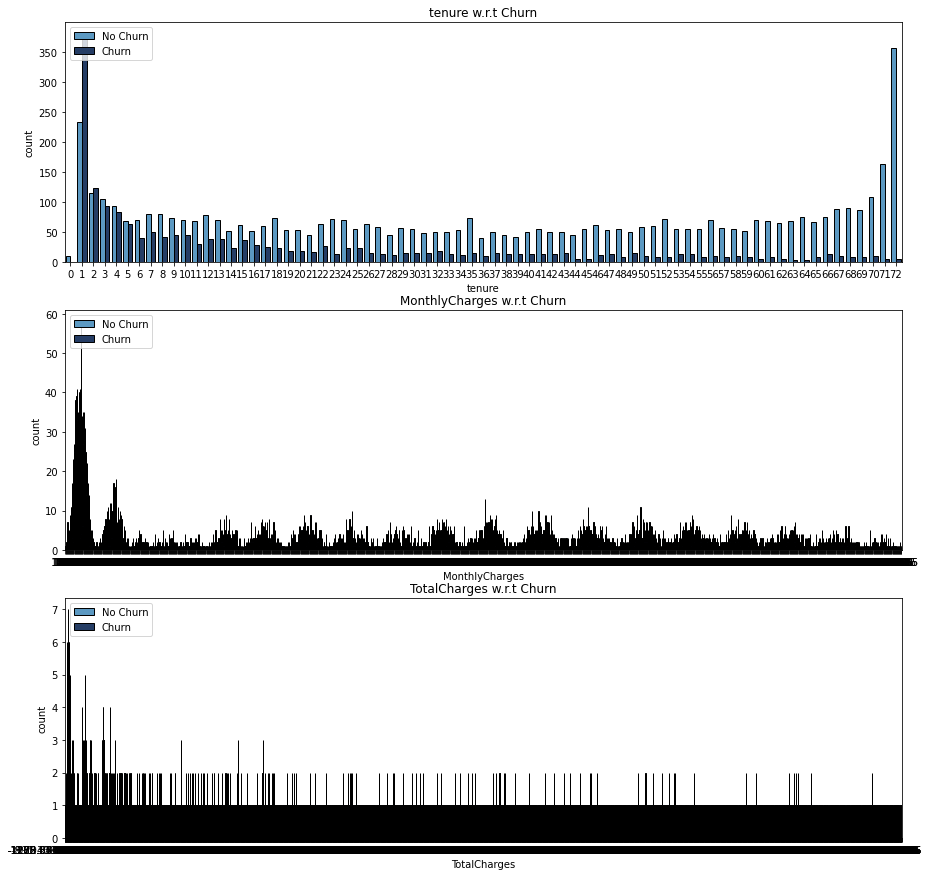

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 1, i + 1)
    sns.countplot(x=numerical_features[i], data=df1, hue="Churn", palette=colors, edgecolor='black')
    plt.legend(['No Churn', 'Churn'], loc='upper left')
    title = numerical_features[i] + ' w.r.t Churn'
    plt.title(title);


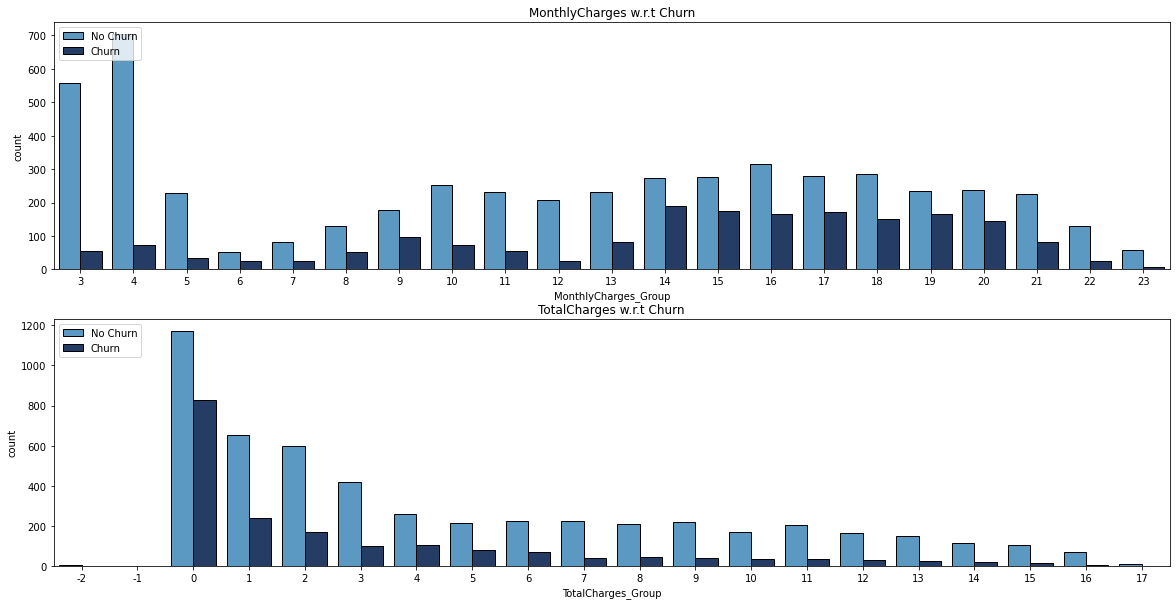

In [ ]:
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
for i in range(len(numerical_features[1:])):
    plt.subplot(2, 1, i + 1)
    sns.countplot(x=numerical_features[1 + i] + '_Group', data=df1, hue="Churn", palette=colors, edgecolor='black')
    plt.legend(['No Churn', 'Churn'], loc='upper left')
    title = numerical_features[1 + i] + ' w.r.t Churn'
    plt.title(title)
plt.show()

##### Числовые признаки в сравнении с категориальными признаками с целевой переменной (отток) :¶

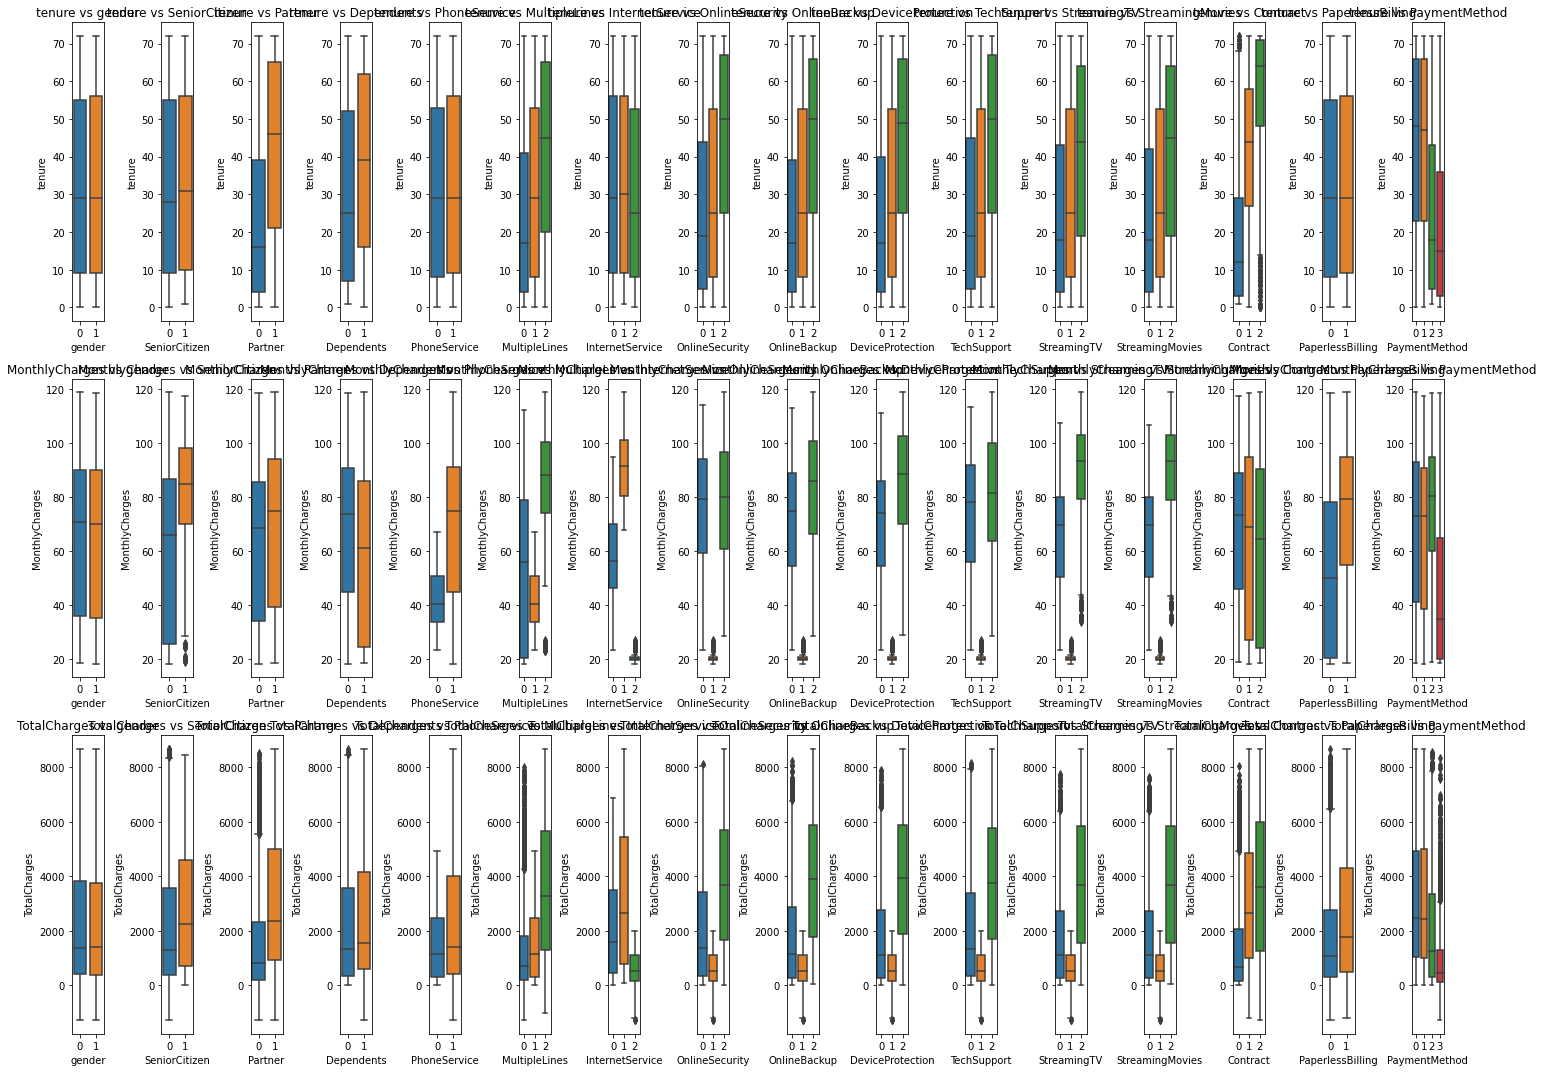

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем числовые и категориальные признаки
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Создаем subplot'ы для каждого числового признака
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=len(categorical_features), figsize=(20, 15))

# Проходим по каждой комбинации числового и категориального признаков и строим boxplot
for i, num_feature in enumerate(numerical_features):
    for j, cat_feature in enumerate(categorical_features):
        sns.boxplot(x=cat_feature, y=num_feature, data=df1, ax=axes[i, j])
        axes[i, j].set_title(f'{num_feature} vs {cat_feature}')
        axes[i, j].set_xlabel(cat_feature)
        axes[i, j].set_ylabel(num_feature)

plt.tight_layout()
plt.show()


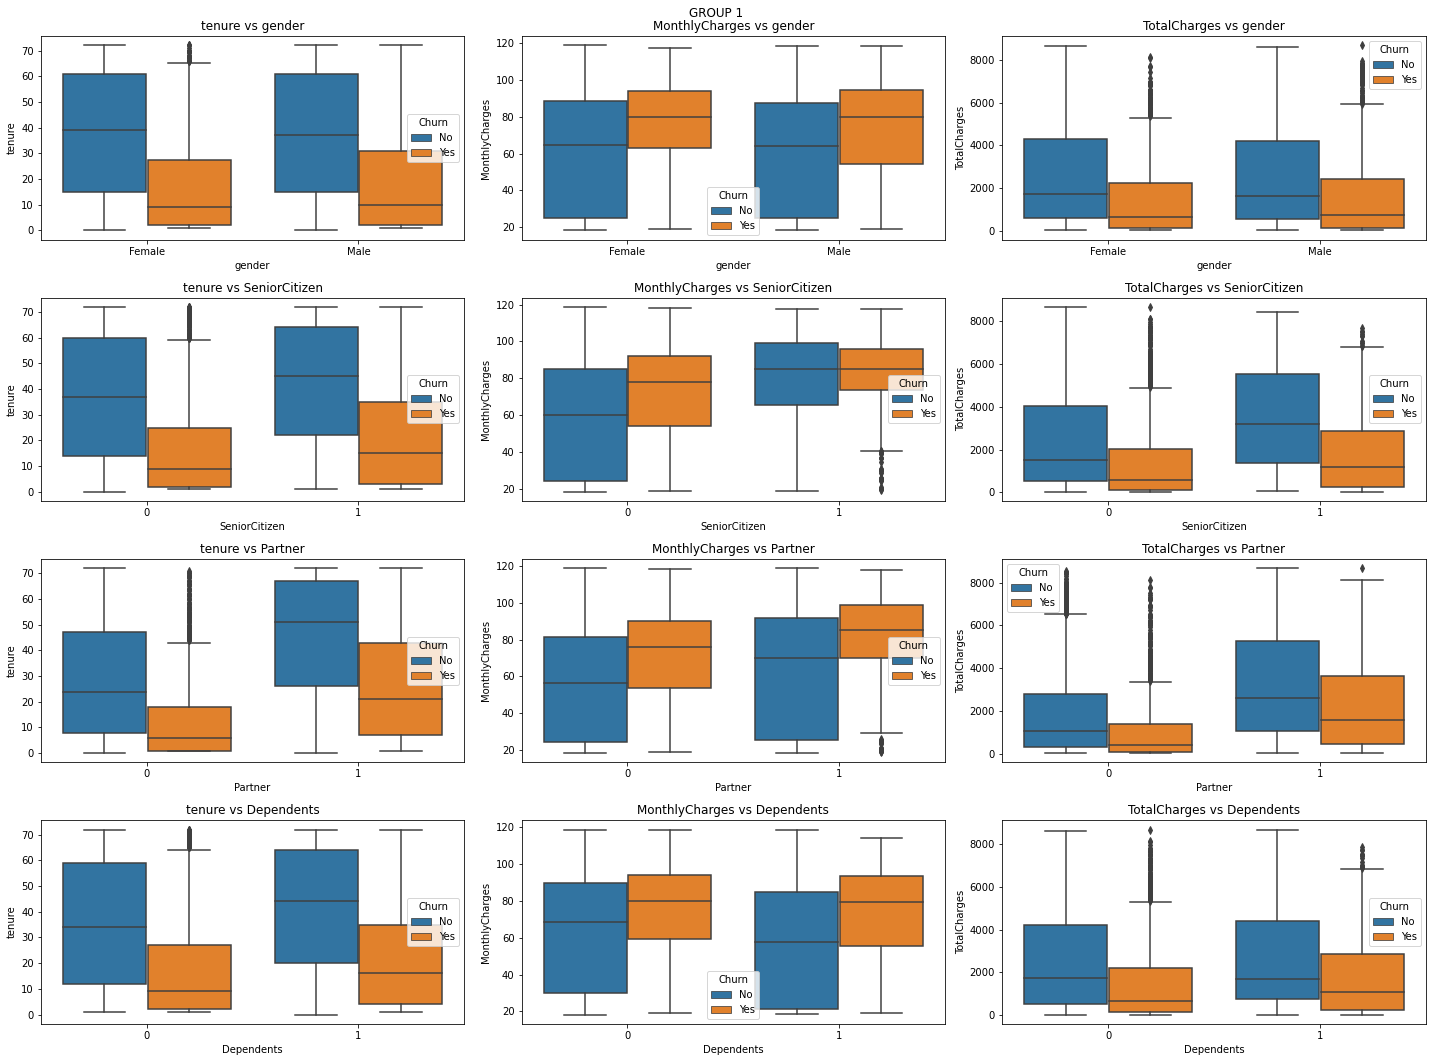

In [ ]:
fig, axes = plt.subplots(nrows=len(group1), ncols=len(numerical_features), figsize=(20, 15))

for i, cat_var in enumerate(group1):
    for j, num_var in enumerate(numerical_features):
        sns.boxplot(x=cat_var, y=num_var, hue='Churn', data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{num_var} vs {cat_var}')
fig.suptitle('GROUP 1')
plt.tight_layout()
plt.show()

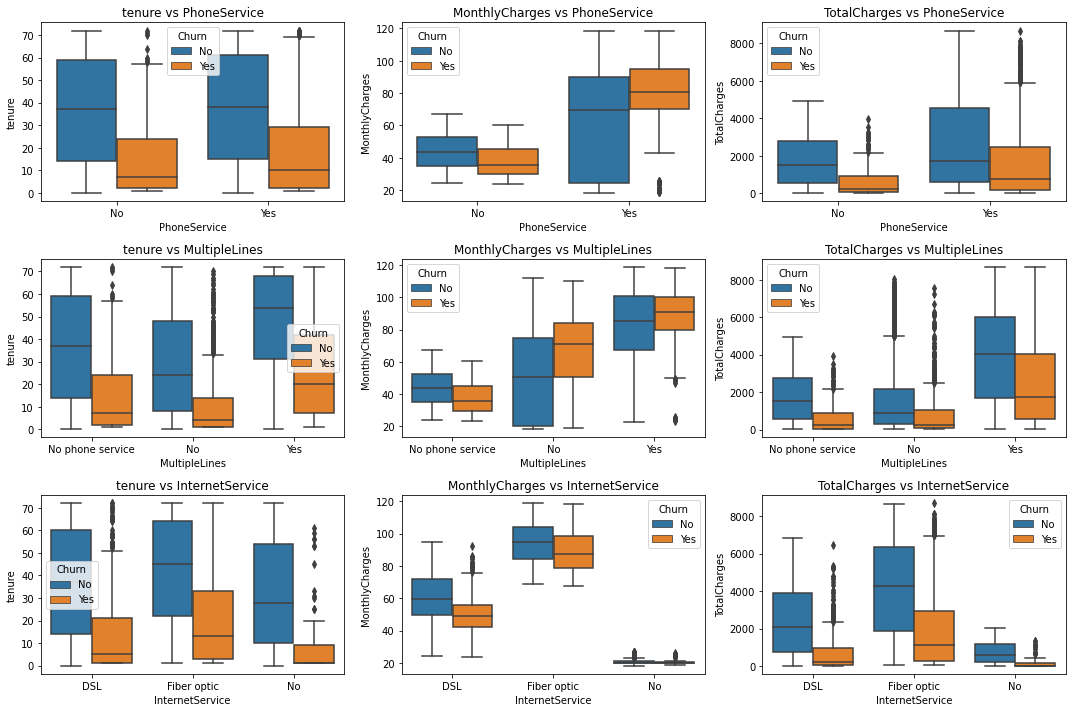

In [ ]:
group21 = ['PhoneService', 'MultipleLines', 'InternetService']
group22 = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity']
group23 = ['OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(nrows=len(group21), ncols=len(numerical_features), figsize=(15, 10))
for i, cat_var in enumerate(group21):
    for j, num_var in enumerate(numerical_features):
        sns.boxplot(x=cat_var, y=num_var, hue='Churn', data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{num_var} vs {cat_var}')
plt.tight_layout()
plt.show()

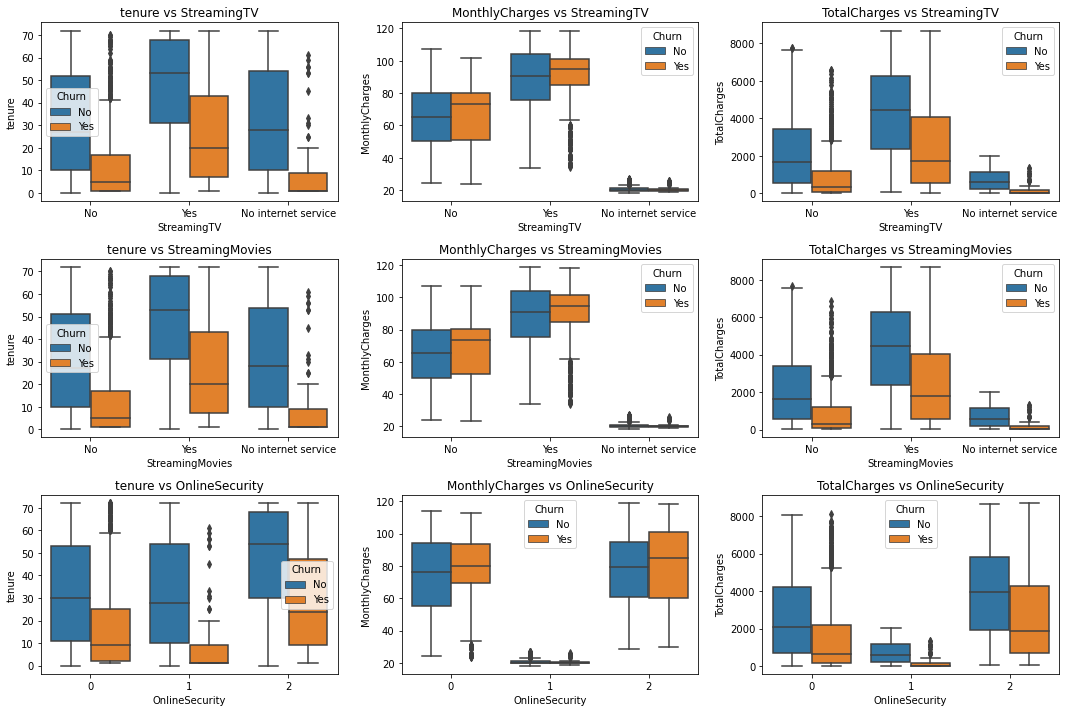

In [ ]:
fig, axes = plt.subplots(nrows=len(group22), ncols=len(numerical_features), figsize=(15, 10))
for i, cat_var in enumerate(group22):
    for j, num_var in enumerate(numerical_features):
        sns.boxplot(x=cat_var, y=num_var, hue='Churn', data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{num_var} vs {cat_var}')
plt.tight_layout()
plt.show()

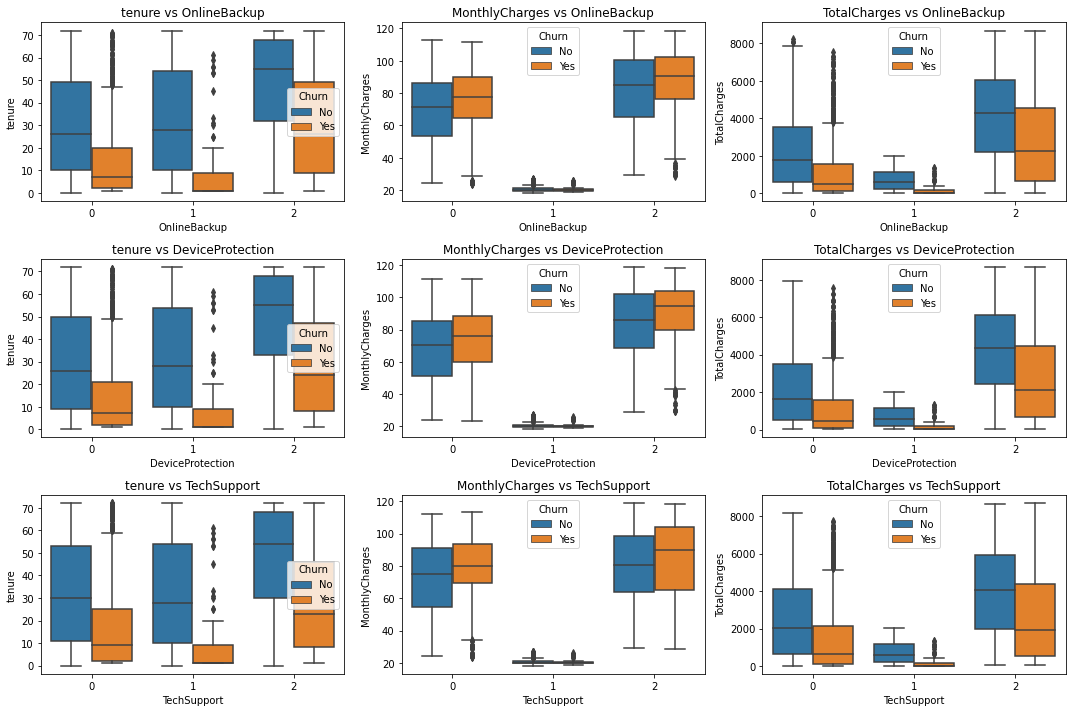

In [ ]:
fig, axes = plt.subplots(nrows=len(group23), ncols=len(numerical_features), figsize=(15, 10))
for i, cat_var in enumerate(group23):
    for j, num_var in enumerate(numerical_features):
        sns.boxplot(x=cat_var, y=num_var, hue='Churn', data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{num_var} vs {cat_var}')
plt.tight_layout()
plt.show()

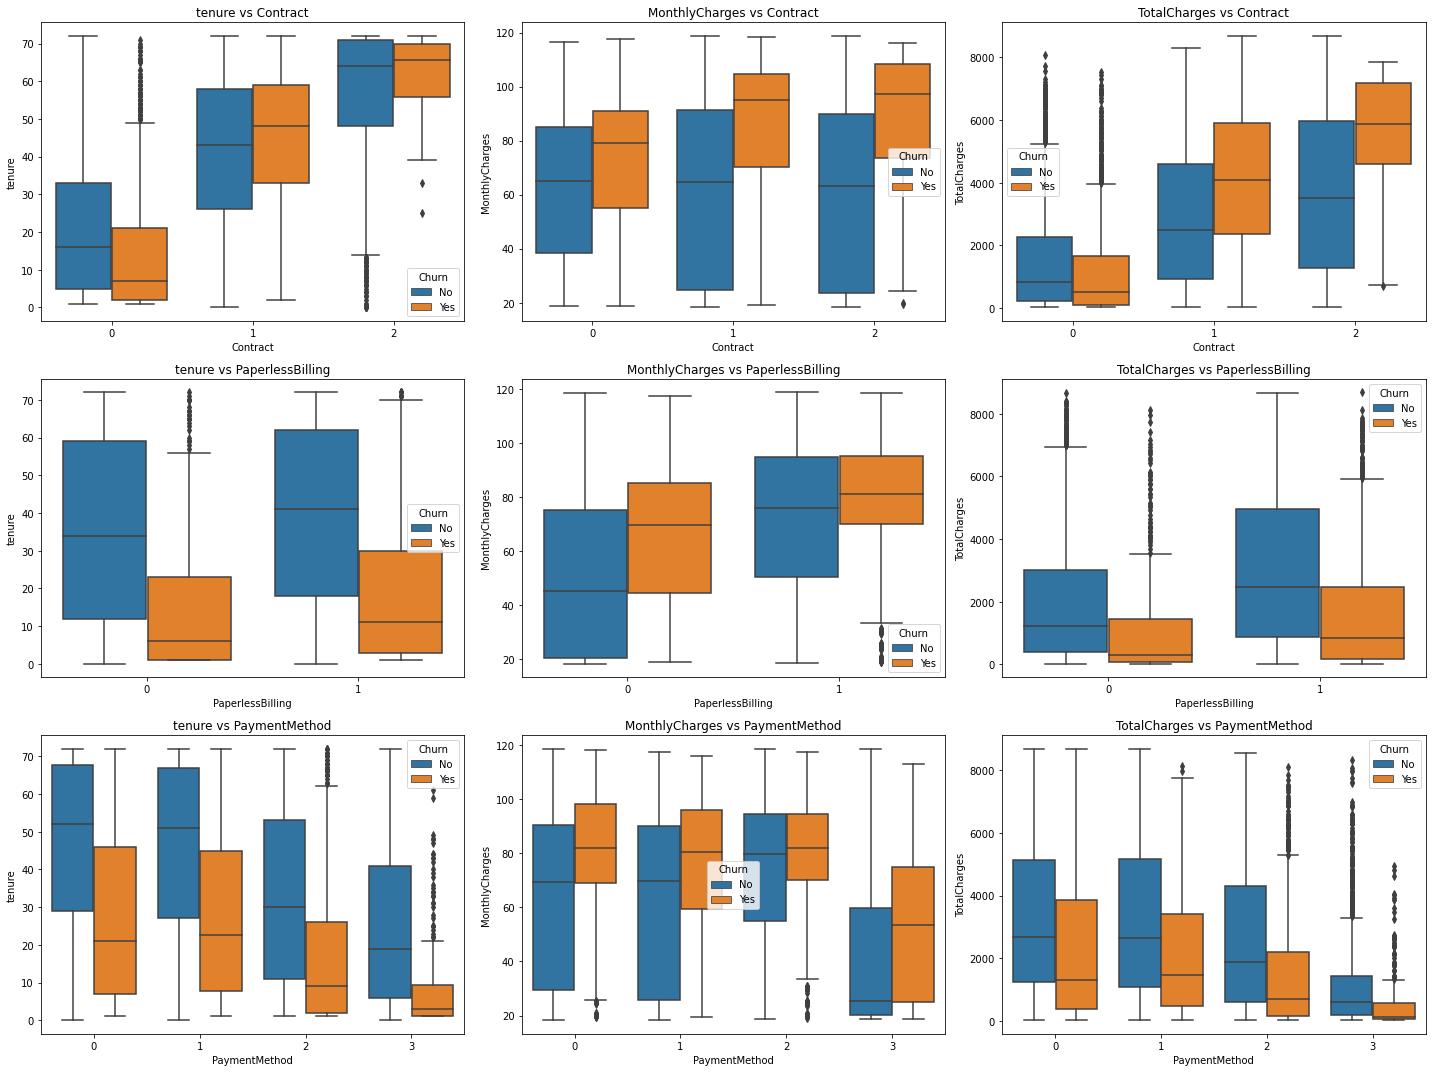

In [ ]:
fig, axes = plt.subplots(nrows=len(group3), ncols=len(numerical_features), figsize=(20, 15))

for i, cat_var in enumerate(group3):
    for j, num_var in enumerate(numerical_features):
        sns.boxplot(x=cat_var, y=num_var, hue='Churn', data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{num_var} vs {cat_var}')

plt.tight_layout()
plt.show()

Относительно ‘tenure’: Когда клиенты подписывают годовые и двухлетние контракты на оказание услуг, они продолжают пользоваться услугами примерно 25 и 45 месяцев соответственно. Однако они уходят в 35 и 55 месяцев соответственно. Независимо от ‘PaperlessBilling’, клиенты задумываются о переходе уже в первый месяц. Что касается метода оплаты, средний срок оттока банковского перевода (автоматический) и кредитной карты (автоматический) более 20 месяцев почти вдвое превышает аналогичный показатель для электронного чека (10 месяцев) и чека, отправляемого по почте (5 месяцев).

Относительно ‘MonthlyCharges’: Нижний предел ежемесячных платежей выше для ежемесячного контракта, чем для контрактов на один год и два года. Однако нижний предел уходящих клиентов ниже для ежемесячного контракта. Нижний предел электронного чека очень высок, и это может стать серьезным фактором, из-за которого клиенты недовольны его использованием. Тогда как чек, отправленный по почте, имеет самые низкие начальные значения среди клиентов, которые ушли и продолжили.

Относительно ‘TotalCharges’: Медианная стоимость клиентов, решивших отказаться от услуг с однолетними и двухлетними контрактами, высока и составляет около 4000 и 6000. Некоторые клиенты с двухлетними контрактами даже заплатили около 7000. Клиенты скептически относятся к оплате электронным чеком в более коротком диапазоне 0–2000, тогда как для банковского перевода (автоматически) и кредитной карты (автоматически) этот диапазон составляет около 0–4000 (‘PaymentMethod’).


### Числовые признаки в сравнении с числовыми признаками относительно целевой переменной (отток)

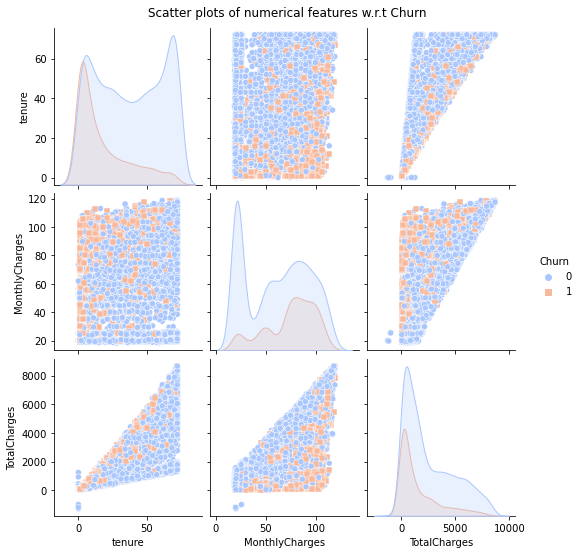

In [ ]:
sns.pairplot(df1, vars=numerical_features, hue='Churn', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Scatter plots of numerical features w.r.t Churn', y=1.02)
plt.show()

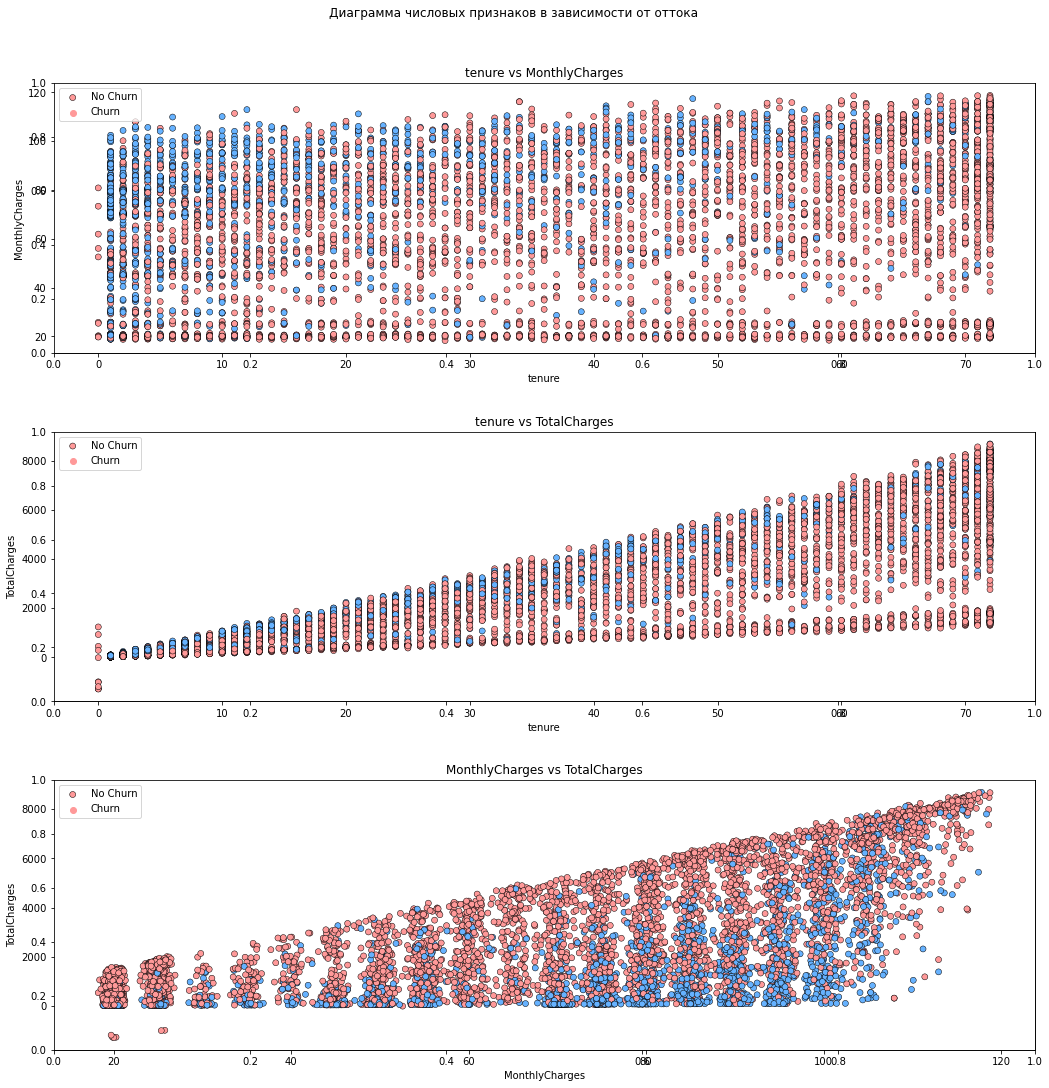

In [ ]:
# Цветовая палитра
colors = ['#FF9999', '#66B2FF']

# Инициализация переменной `a` перед циклом
a = 0
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# Построение scatter plot для каждой пары числовых признаков
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            # Добавление subplot с помощью `fig.add_subplot`
            ax = fig.add_subplot(3, 1, a)
            sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=df1, hue='Churn', palette=colors, edgecolor='black', ax=ax)
            ax.legend(['No Churn', 'Churn'], loc='upper left')
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            ax.set_title(title)

# Добавление общего заголовка для всех графиков
plt.suptitle('Диаграмма числовых признаков в зависимости от оттока', y=1.02)
plt.tight_layout()
plt.show()

# Саммари анализа

# Feature Engineering

### 1. Масштабирование данных


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler() # Normalization

df1.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.01,0,1,0,0,2,0,0,0,0,0,1,2,0.12,0.13,0
1,1,0,0,0,0.47,1,0,0,2,0,2,0,0,0,1,0,3,0.39,0.32,0
2,1,0,0,0,0.03,1,0,0,2,2,0,0,0,0,0,1,3,0.35,0.14,1
3,1,0,0,0,0.62,0,1,0,2,0,2,2,0,0,1,0,0,0.24,0.31,0
4,0,0,0,0,0.03,1,0,1,0,0,0,0,0,0,0,1,2,0.52,0.14,1


In [ ]:
mms

MinMaxScaler()

### Корреляционная матрица

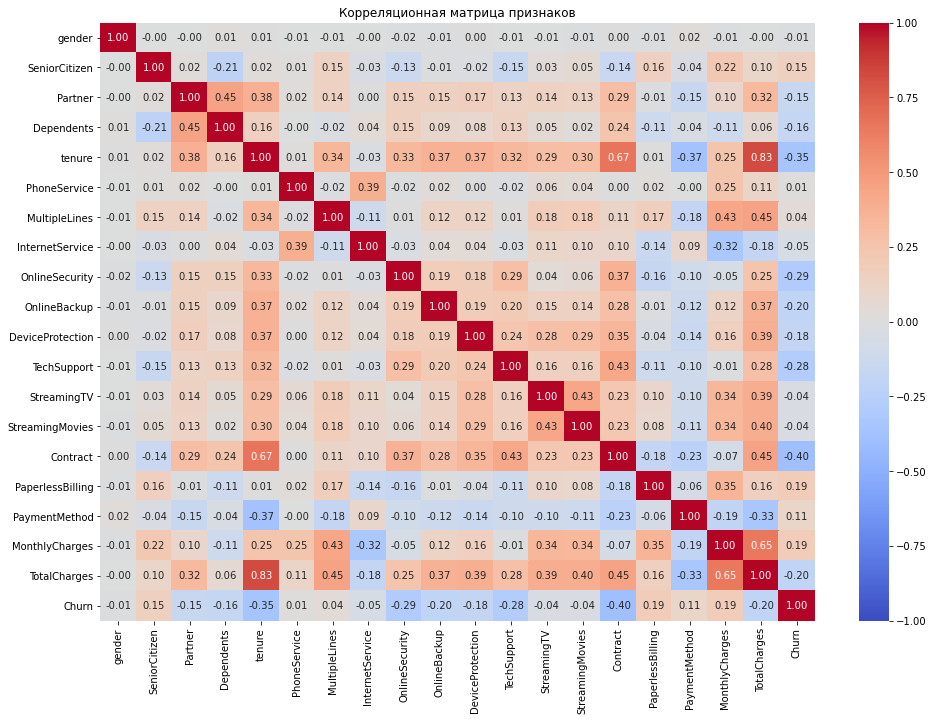

In [ ]:
# Вычисляем корреляционную матрицу
corr_matrix = df1.corr()

# Настраиваем размер графика
plt.figure(figsize=(16, 11))

# Создаем тепловую карту корреляционной матрицы
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)

# Добавляем заголовок
plt.title('Корреляционная матрица признаков')

# Показываем график
plt.show()

Корреляционная матрица позволяет определить степень взаимосвязи между различными признаками в датасете.

Это помогает выявить потенциальные проблемы мультиколлинеарности, что может улучшить интерпретируемость и эффективность моделей машинного обучения.

Построим отдельно корреляционную матрицу с ‘Churn’.


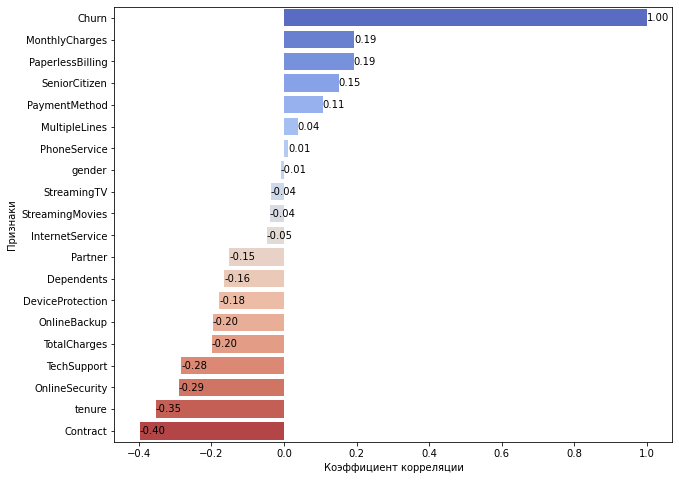

In [ ]:
# Вычисляем корреляцию всех признаков с Churn
corr_with_churn = df1.corr()['Churn'].sort_values(ascending=False)

# Настраиваем размер графика
plt.figure(figsize=(10, 8))

# Создаем горизонтальный столбчатый график
ax = sns.barplot(x=corr_with_churn.values, y=corr_with_churn.index, palette='coolwarm')

# Добавляем заголовок и метки осей

plt.xlabel('Коэффициент корреляции')
plt.ylabel('Признаки')

# Добавляем аннотации значений корреляции
for i, value in enumerate(corr_with_churn.values):
    ax.text(value, i, f'{value:.2f}', va='center', ha='left', color='black')

# Показываем график
plt.show()


‘MulipleLines’, ‘PhoneService’, ‘gender’, ‘StreamingTV’, ‘StreamingMovies’ и ‘InternetService’ не отображают никакой корреляции. Мы отбрасываем признаки с коэффициентом корреляции между (-0,1,0,1).

Остальные функции демонстрируют значительную положительную или отрицательную корреляцию.


### Отбор признаков для категориальных признаков:

Для того чтобы отобрать категориальные переменные, проведем тест хи-квадрат.

Нулевая гипотеза (H0): категориальные переменные независимы;
Альтернативная гипотеза (H1): существует статистическая зависимость между категориальными переменными.


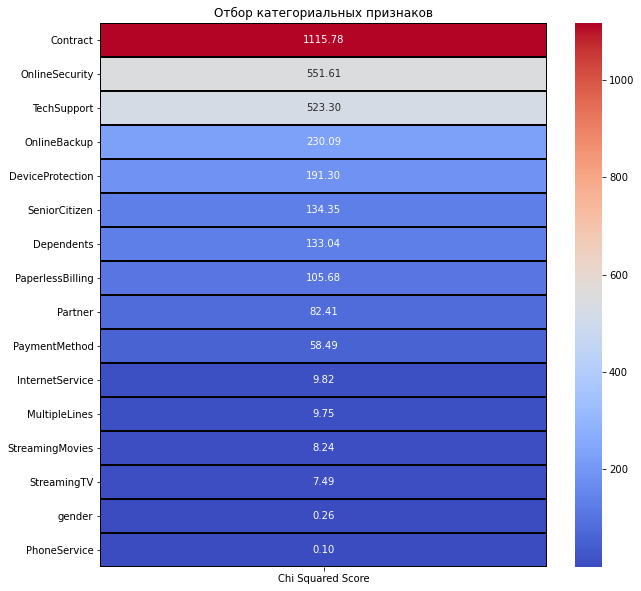

In [ ]:
# Категориальные признаки и целевая переменная
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                        'PhoneService', 'MultipleLines', 'InternetService',
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']
target = df1['Churn']

# Проверка, если признаки уже нормализованы и закодированы
features = df1[categorical_features]

# Применение теста хи-квадрат для отбора признаков
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Сохранение результатов в DataFrame
feature_scores = pd.DataFrame(data=fit.scores_, index=categorical_features, columns=['Chi Squared Score'])

# Визуализация результатов с помощью тепловой карты
plt.figure(figsize=(10, 10))
sns.heatmap(feature_scores.sort_values(by='Chi Squared Score', ascending=False), annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Отбор категориальных признаков')
plt.show()


# Отбор признаков для численных переменных

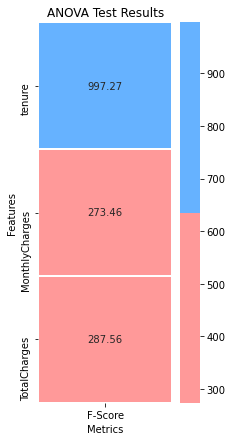

In [ ]:
# Вычисление статистики F и p-value для каждого численного признака
f_scores, p_values = f_classif(df1[numerical_features], target)

# Создание DataFrame для результатов
anova_results = pd.DataFrame({
    'Feature': numerical_features,
    'F-Score': f_scores,
})

# Устанавливаем название признака в качестве индекса
anova_results.set_index('Feature', inplace=True)

# Создание тепловой карты
plt.figure(figsize=(3, 7))
sns.heatmap(anova_results, annot=True, cmap=colors, fmt='.2f', linewidths=0.5)
plt.title('ANOVA Test Results')
plt.xlabel('Metrics')
plt.ylabel('Features')
plt.show()


In [ ]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.13,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.32,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.14,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.31,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.14,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   float64
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   Contract          7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   int64  
 10  PaymentMethod     7043 non-null   int64  
 11  MonthlyCharges    7043 non-null   float64
 12  TotalCharges      7043 non-null   float64
 13  Churn             7043 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 770.5 KB


### Балансировка данных с помощью SMOTE

Набор данных несбалансирован примерно в соотношении 3 : 1 для клиентов Not-Churn: Churn. Из-за этого прогнозы будут смещены в сторону клиентов, не отходящих от клиентов. Визуализации также отобразили эту предвзятость.

Чтобы справиться с несбалансированными данными, воспользуемся передискретизация, то есть увеличить меньшую выборку до количества значений большей выборки.
Для этого будет использован метод SMOTE (Synthetic Minority Over-sampling Technique).

В результате использования SMOTE количество образцов для каждого класса уравнивается, но данные становятся более разнообразными за счет добавления синтетических образцов.

В результате получаем в каждой выборке 5174 наблюдений.


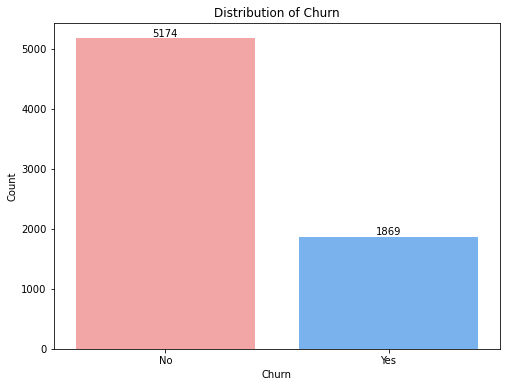

In [ ]:
# Подсчет количества наблюдений в каждом классе
counts = df['Churn'].value_counts()

# Создание столбчатой диаграммы
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, palette=colors)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Добавление подписей к столбцам
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
over = SMOTE(sampling_strategy = 1) #уравниваем количество наблюдений в каждом классе

f1 = df1.iloc[:,:13].values
t1 = df1.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5174, 1: 5174})

In [ ]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.01,0,2,0,0,0,1,2,0.12,0.13,0
1,0,0,0,0.47,2,0,2,0,1,0,3,0.39,0.32,0
2,0,0,0,0.03,2,2,0,0,0,1,3,0.35,0.14,1
3,0,0,0,0.62,2,0,2,2,1,0,0,0.24,0.31,0
4,0,0,0,0.03,0,0,0,0,0,1,2,0.52,0.14,1


# Моделирование

Для начала разделим данные на обучающую (80%) и тестовые (20%) выборки. Такое разделение обеспечивает независимую оценку моделей.

На первый взгляд кажется, что задача сводится к бинарной классификации с метками 1, если клиент останется с компанией и 0 – иначе.

Однако если копнуть глубже в процессы компании, то окажется, что такие метки практически бесполезны. Компании скорее интересно упорядочить клиентов по вероятности прекращения обслуживания и в зависимости от этого применять разные варианты удержания: кому-то прислать скидочный купон от партнёра, кому-то предложить скидку на сл

едующий месяц, а кому-то и новый тариф на особых условиях. По этой причине используем метрику AUC (Area Under the ROC Curve) — это мера, которая позволяет суммировать производительность модели одним числом, измеряя площадь под кривой ROC.

Также для оценки качества моделей будем использовать стандартные метрики  машинного обучения, такие как Cross Validation Score и F1 Score.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [ ]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test, prediction)))

    # Используем RocCurveDisplay
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

В ходе анализа данных и разработки модели прогнозирования оттока клиентов были рассмотрены несколько моделей машинного обучения. В процессе работы были использованы следующие алгоритмы:
1.	Xgboost;
2.	KNN;
3.	Random Forest Classifier;
4.	Gradient Boosting;
5.	AdaBoost;
6.	Decision Tree Classifier;
7.	Logistic Regression.


## 1. Xgboost Classifier

In [ ]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  90.25%
ROC_AUC Score :  82.72%


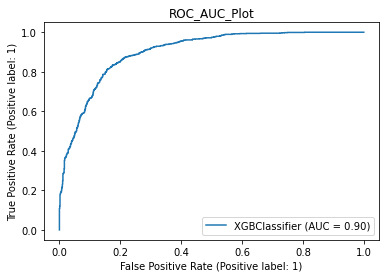

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1040
           1       0.80      0.86      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



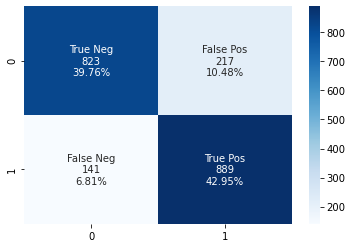

In [ ]:
model(classifier_xgb,x_train,y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

## 2. KNN

Cross Validation Score :  84.92%
ROC_AUC Score :  77.48%


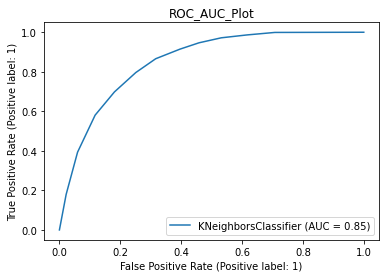

              precision    recall  f1-score   support

           0       0.84      0.68      0.75      1040
           1       0.73      0.87      0.79      1030

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



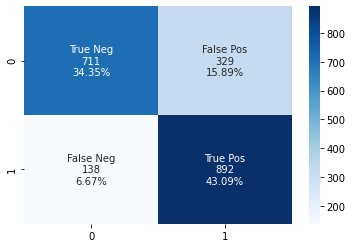

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
model(knn_model,x_train,y_train,x_test,y_test)
model_evaluation(knn_model,x_test,y_test)

## 3. Random Forest Classifier

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  85.94%
ROC_AUC Score :  78.68%


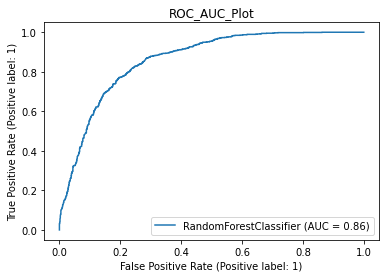

              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1040
           1       0.75      0.85      0.80      1030

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



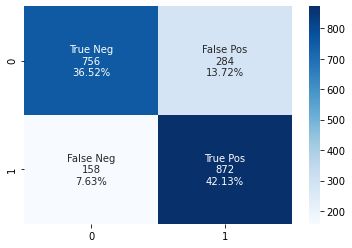

In [ ]:
model(classifier_rf,x_train,y_train,x_test,y_test)
model_evaluation(classifier_rf,x_test,y_test)

## 4. Decision Tree Classifier

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 12)

Cross Validation Score :  85.14%
ROC_AUC Score :  77.41%


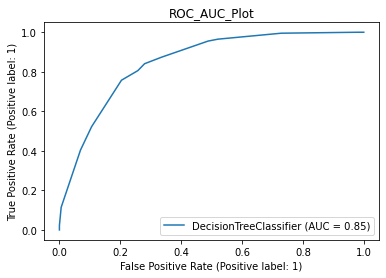

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1040
           1       0.76      0.81      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.78      0.77      0.77      2070



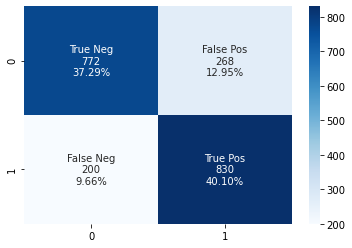

In [ ]:
model(classifier_dt,x_train,y_train,x_test,y_test)
model_evaluation(classifier_dt,x_test,y_test)

# Logistic Regression

Cross Validation Score :  85.06%
ROC_AUC Score :  77.17%


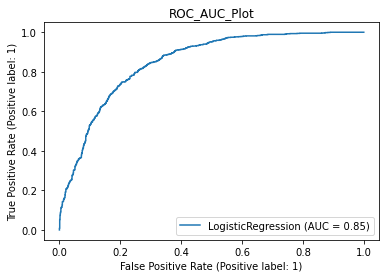

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1040
           1       0.75      0.82      0.78      1030

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



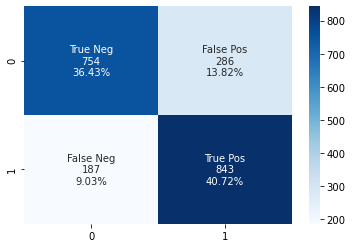

In [ ]:
lr_model = LogisticRegression()
model(lr_model,x_train,y_train,x_test,y_test)
model_evaluation(lr_model,x_test,y_test)

# AdaBoost

Cross Validation Score :  88.22%
ROC_AUC Score :  80.50%


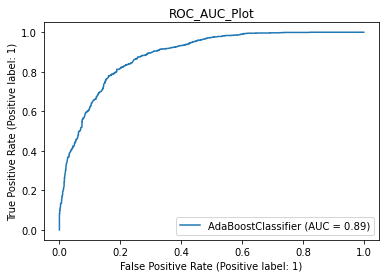

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1040
           1       0.78      0.84      0.81      1030

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



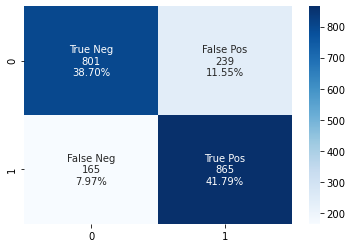

In [ ]:
a_model = AdaBoostClassifier()
model(a_model,x_train,y_train,x_test,y_test)
model_evaluation(a_model,x_test,y_test)

# Gradient Boosting

Cross Validation Score :  90.42%
ROC_AUC Score :  82.87%


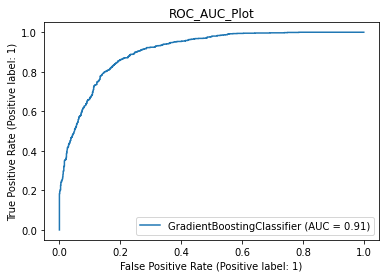

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1040
           1       0.81      0.86      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



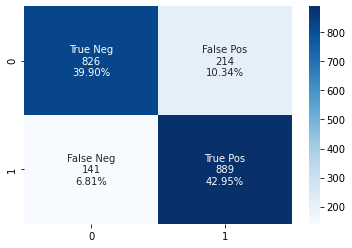

In [ ]:
gb = GradientBoostingClassifier()
model(gb,x_train,y_train,x_test,y_test)
model_evaluation(gb,x_test,y_test)

# Ансамблевый метод Stacking Classifier

Было принято решение объединить лучшие модели в ансамблевый метод — Stacking Classifier. Это позволило улучшить обобщающую способность и повысить точность предсказаний.
Для построения ансамблевой модели была использована библиотека sklearn.ensemble, а конкретно класс StackingClassifier. Ансамбль был построен из следующих моделей:

•	Xgboost (classifier_xgb);
•	Gradient Boosting (gb);
•	Random Forest Classifier (classifier_rf);
•	AdaBoost (a_model);
•	KNN (knn_model).

Ключевой гиперпараметр Stacking Classifier — final_estimator, который использует прогнозы всех базовых моделей для вынесения окончательного решения. В данном случае, для final_estimator был выбран classifier_xgb.
По итогам применения ансамблевой модели, были получены следующие результаты:

•	Cross Validation Score = 91.21% (Высокий результат свидетельствует о надежности и обобщающей способности модели);

•	AUC = 83.54% (Значение указывает на хорошую способность модели различать между клиентами, которые останутся, и теми, кто уйдет.);

•	F1-score = 84% (F1-score является гармоническим средним между точностью (precision) и полнотой (recall). Значение 84% указывает на хороший баланс между этими двумя метриками).

Матрица ошибок для ансамблевой модели выдает следующие результаты:

•	TN (True Negative) = 841: Клиенты, которые не уйдут, и модель правильно это предсказала;

•	FP (False Positive) = 199: Клиенты, которые не уйдут, но модель ошибочно предсказала их отток;

•	FN (False Negative) = 142: Клиенты, которые уйдут, но модель не предсказала их отток;

•	TP (True Positive) = 888: Клиенты, которые уйдут, и модель правильно это предсказала.

Ансамблевый метод Stacking Classifier показал наилучшие результаты среди всех рассмотренных моделей, обеспечив высокие показатели Cross Validation Score, AUC и F1-score. Это подтверждает эффективность использования нескольких моделей в одном ансамбле для повышения точности предсказаний.

Высокие значения метрик и сбалансированная матрица ошибок свидетельствуют о том, что модель обладает хорошей обобщающей способностью и может эффективно использоваться для предсказания оттока клиентов.


In [ ]:
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('gb',gb),
                                         ('classifier_rf',classifier_rf),
                                         ('a_model',a_model)],
                           final_estimator = classifier_xgb)

Cross Validation Score :  91.04%
ROC_AUC Score :  83.53%


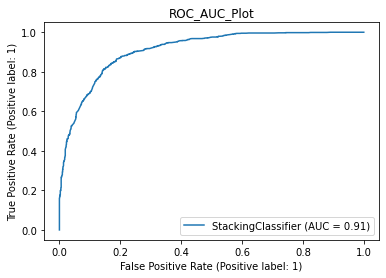

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1040
           1       0.83      0.85      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



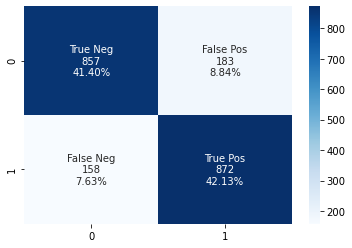

In [ ]:
model(stack,x_train,y_train,x_test,y_test)
model_evaluation(stack,x_test,y_test)

In [ ]:
stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('gb',gb),
                                         ('classifier_rf',classifier_rf),
                                         ('a_model',a_model),
                                         ('knn_model',knn_model)],
                           final_estimator = classifier_xgb)

Cross Validation Score :  91.29%
ROC_AUC Score :  83.72%


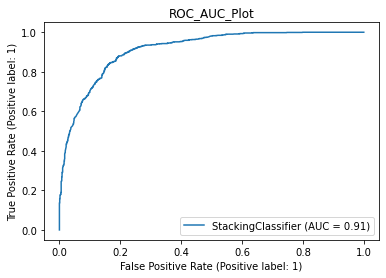

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1040
           1       0.83      0.85      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



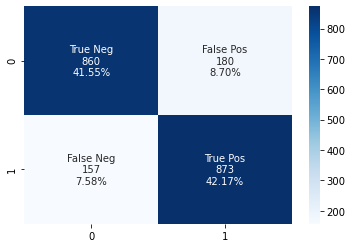

In [ ]:
model(stack,x_train,y_train,x_test,y_test)
model_evaluation(stack,x_test,y_test)

In [ ]:
import joblib
filename = 'model.sav'
joblib.dump(stack, filename)

['model.sav']

# Рекомендации по сокращению оттока клиентов и увеличения выручки

Для достижения успеха необходимо обратить внимание на три категории клиентов: пожилых граждан, проживающих с партнером и одиноких клиентов.

Хотя количество пожилых клиентов невелико, но они готовы платить больше. Клиенты с партнером и те, кто живет в одиночестве, предпочитают услуги с более низкой ежемесячной платой.

Для установления прочной базы клиентов необходимо предлагать простые и доступные услуги на первые 6 месяцев, с акцентом на безопасность данных, резервное копирование, защиту устройств и техническую поддержку. Этот период наиболее критичен и нестабилен для клиентов.

После установления надежной системы поддержки клиентов необходимо стимулировать использование многоканальной связи и оптоволоконных кабелей. Необходимо создать комбинации услуг среднемесячной оплаты от 100 до 120, чтобы увеличить доход от пользователя и исключить более дешевые варианты, которые могут стать причиной оттока клиентов. Примеры комбинаций: ‘No MultipleLines’+ ‘OpticFiber’; ‘MultipleLines’ + ‘DSL’).

Стриминговые сервисы также должны стать доступнее. Контент должен быть ориентирован на разнообразные типы клиентов. Стоит отметить, что это должно сопровождаться простым и удобным методом оплаты.

Необходимо прекратить использование электронного чека из-за высокого уровня оттока и сосредоточиться на банковском переводе и кредитной карте.

Такие меры помогут увеличить выручку и улучшить качество предоставляемых услуг.
